In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("A2_student_2025.ipynb")      # Your nootebook filename.

ModuleNotFoundError: No module named 'otter'

# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualize it and identify erroneous values [30%]
 - Load data from the CSV file `assignment2_data_2025.csv` (found on MyUni). (Use `data` as the variable name for the loaded DataFrame in the code for the autograding.)
 - Extract the feature names (use `features` as the variable name) and the label name (use `label` as the variable name) for later use.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Ensure the graphical plots are clearly labeled, including feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualization or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [2]:
# Your code here. Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.

# Load dataset
data = pd.read_csv("assignment2_data_2025.csv")

# Preview the top rows
print("Preview of Dataset:")
display(data.head())

Preview of Dataset:


label         mean radius  mean texture  mean perimeter   mean area  \
0  malignant  15.494653829645529     15.902542      103.008265  776.437239   
1  malignant  16.229870799611437     18.785613      105.176755  874.712003   
2  malignant   16.34567074196476     20.114076      107.083804  872.563251   
3   maligant  13.001009157806651     19.876997       85.889775  541.281012   
4  malignant  16.416060073302194     17.397533      107.857386  891.516818   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0         0.104239          0.168660        0.170572             0.085668   
1         0.091843          0.092548        0.081681             0.053670   
2         0.099924          0.123799        0.128788             0.078310   
3         0.113423          0.173069        0.146214             0.069574   
4         0.097321          0.111530        0.125971             0.068575   

   mean symmetry  ...  radius error  texture error  perimeter error  \
0       0.205053  ...      0.653654       1.096678         4.962255   
1       0.180435  ...      0.445451       1.043931         3.005373   
2       0.189756  ...      0.549625       1.057447         3.643671   
3       0.212078  ...      0.430693       1.202955         3.051434   
4       0.179562  ...      0.525532       1.045900         3.747194   

   area error  smoothness error  compactness error  concavity error  \
0   80.619370          0.006669           0.034950         0.043568   
1   50.407958          0.006352           0.019998         0.025324   
2   62.732851          0.006757           0.031325         0.034350   
3   33.614356          0.007930           0.044881         0.042972   
4   59.164555          0.008718           0.024231         0.039763   

   concave points error  symmetry error  fractal dimension error  
0              0.013765        0.024093                 0.004928  
1              0.012172        0.018084                 0.003582  
2              0.015150        0.021459                 0.004066  
3              0.014556        0.035670                 0.005981  
4              0.014202        0.019236                 0.004115  

[5 rows x 21 columns]

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Dataset info
print("Dataset Info:")
data.info()

# Check for missing values
print("\nMissing Values:")
missing = data.isnull().sum()
if missing.any():
    display(missing[missing > 0])
else:
    print("No missing values detected.")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error  

symmetry error    1
dtype: int64

In [5]:
# Convert 'mean radius' to numeric (was mistakenly read as object)
data["mean radius"] = pd.to_numeric(data["mean radius"], errors='coerce')

# Re-check and report coercion results
if data["mean radius"].isnull().sum() > 0:
    print(f"Warning: {data['mean radius'].isnull().sum()} non-numeric entries found in 'mean radius'.")

# Handle the single missing value in 'symmetry error' — we'll fill with column mean
data["symmetry error"].fillna(data["symmetry error"].mean(), inplace=True)

# Final confirmation
print("Data cleaned: types fixed, missing values handled.")

Data cleaned: types fixed, missing values handled.


In [6]:
# Fill missing value in 'mean radius' with column mean
data["mean radius"].fillna(data["mean radius"].mean(), inplace=True)

# Confirm no missing values remain
print("Re-check missing values:")
missing = data.isnull().sum()
print(missing[missing > 0] if missing.any() else "No missing values remaining.")

Re-check missing values:
No missing values remaining.


In [7]:
# Step 1.4 — Extract features and label, then analyze class balance

# Extract feature columns (all except 'label') and target
X = data.drop(columns=["label"])
y = data["label"]

# Check unique class labels
print("Unique classes in label column:")
print(y.unique())

# Class balance check
print("\nClass distribution:")
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
display(pd.DataFrame({
    "Count": class_counts,
    "Percentage (%)": class_percentages.round(2)
}))

Unique classes in label column:
['malignant' 'maligant' 'benign']

Class distribution:


Count  Percentage (%)
label                           
benign       154           70.00
malignant     65           29.55
maligant       1            0.45

In [8]:
# Fix the typo in the original data 'label' column
data['label'] = data['label'].replace({'maligant': 'malignant'})

# Re-extract features and label after fix
X = data.drop(columns=['label'])
y = data['label']

# Confirm the fix
print("Typo fixed in 'label' column.")
print("Unique classes now:")
print(y.unique())

Typo fixed in 'label' column.
Unique classes now:
['malignant' 'benign']


In [9]:
# Extract feature names and label name for autograder

features = list(X.columns)
label = 'label'

print(f"Features extracted: {features}")
print(f"Label name: {label}")

Features extracted: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
Label name: label


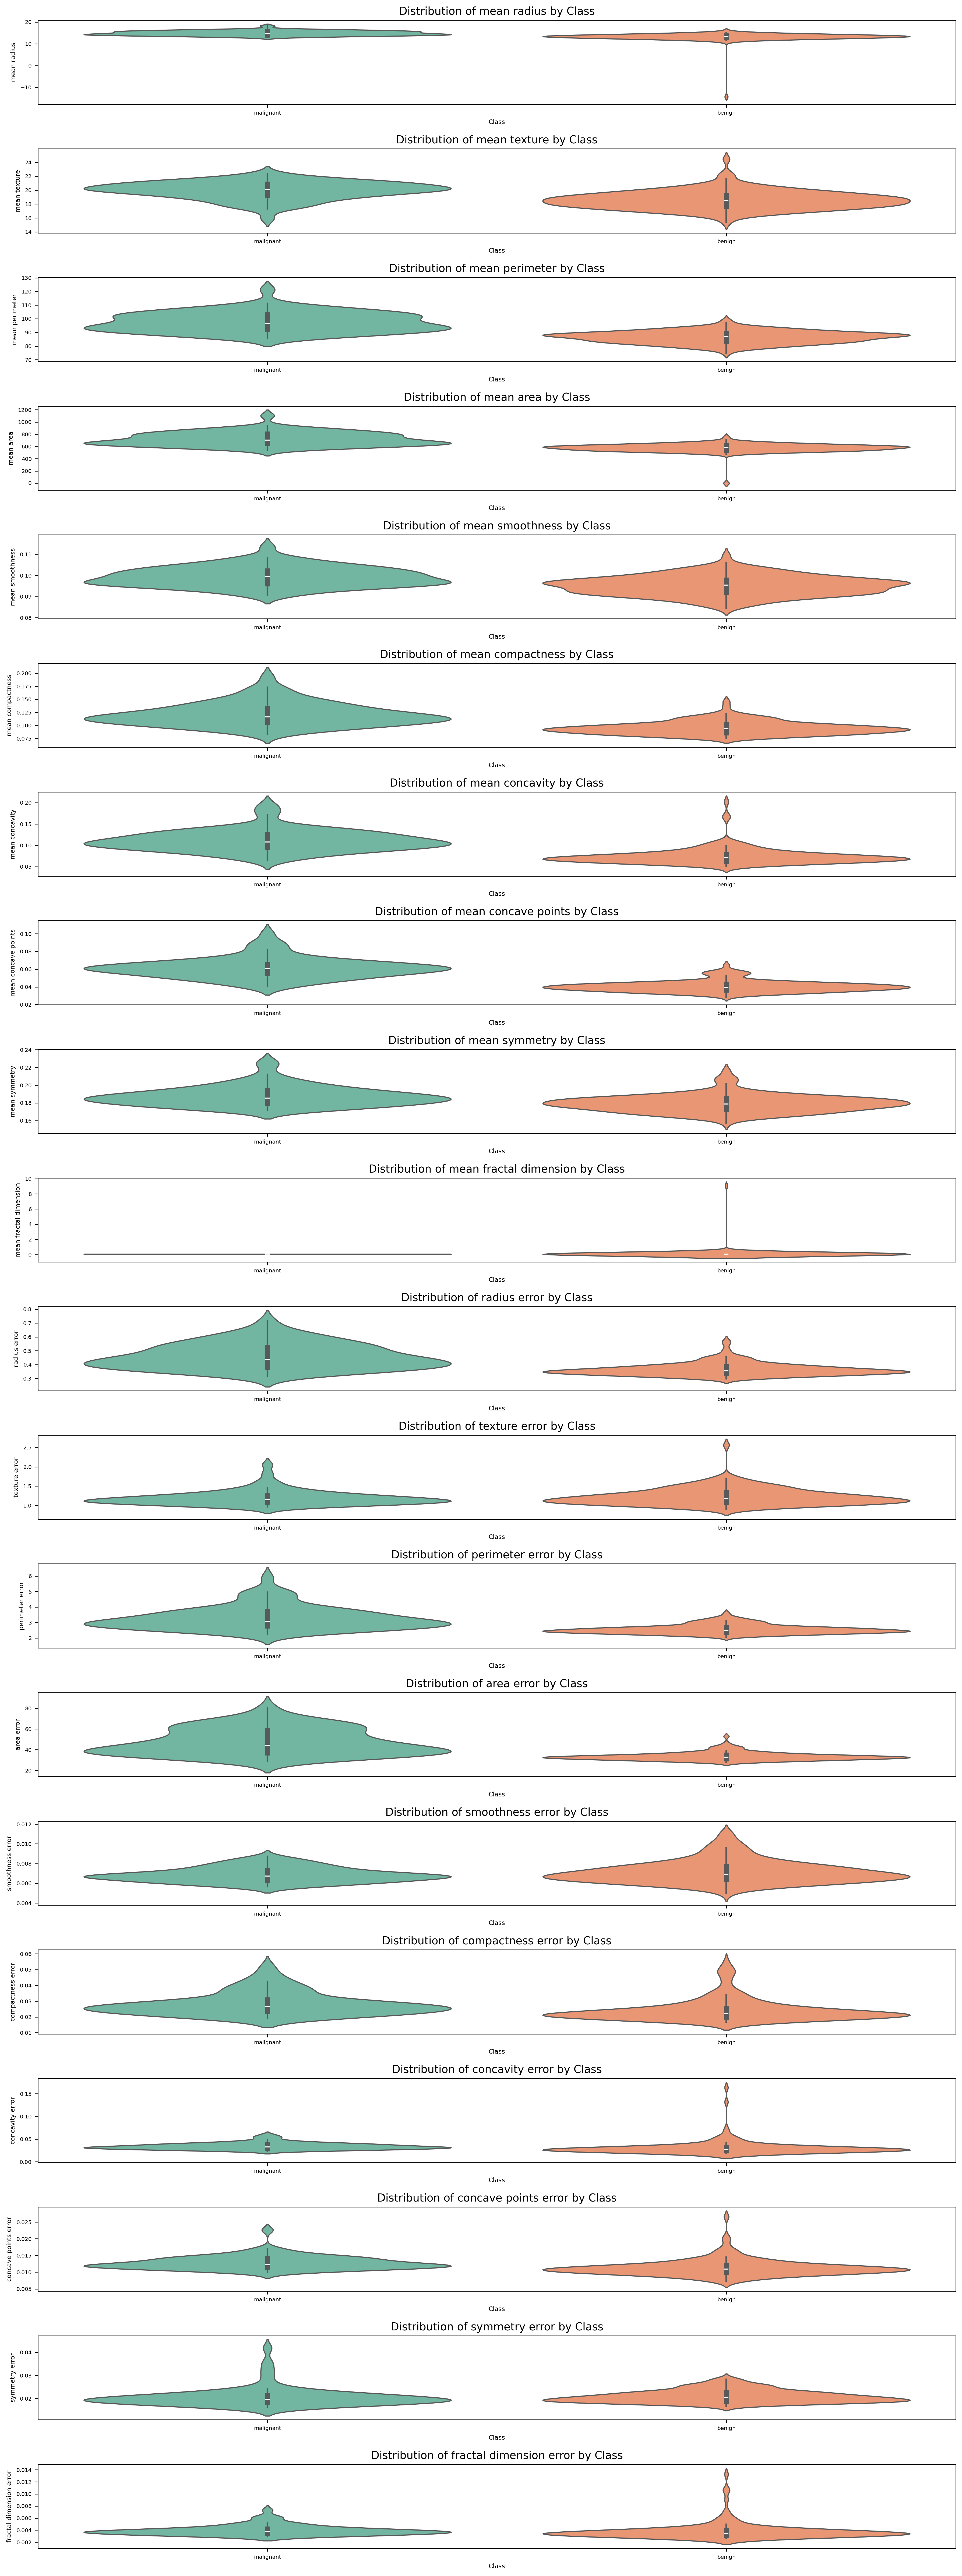

In [10]:
# Step 1.4: Visualize each feature grouped by label

plt.figure(figsize=(15, 40))  # tall figure to fit all plots nicely

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.violinplot(x='label', y=feature, data=data, palette='Set2')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.tight_layout()

plt.show()

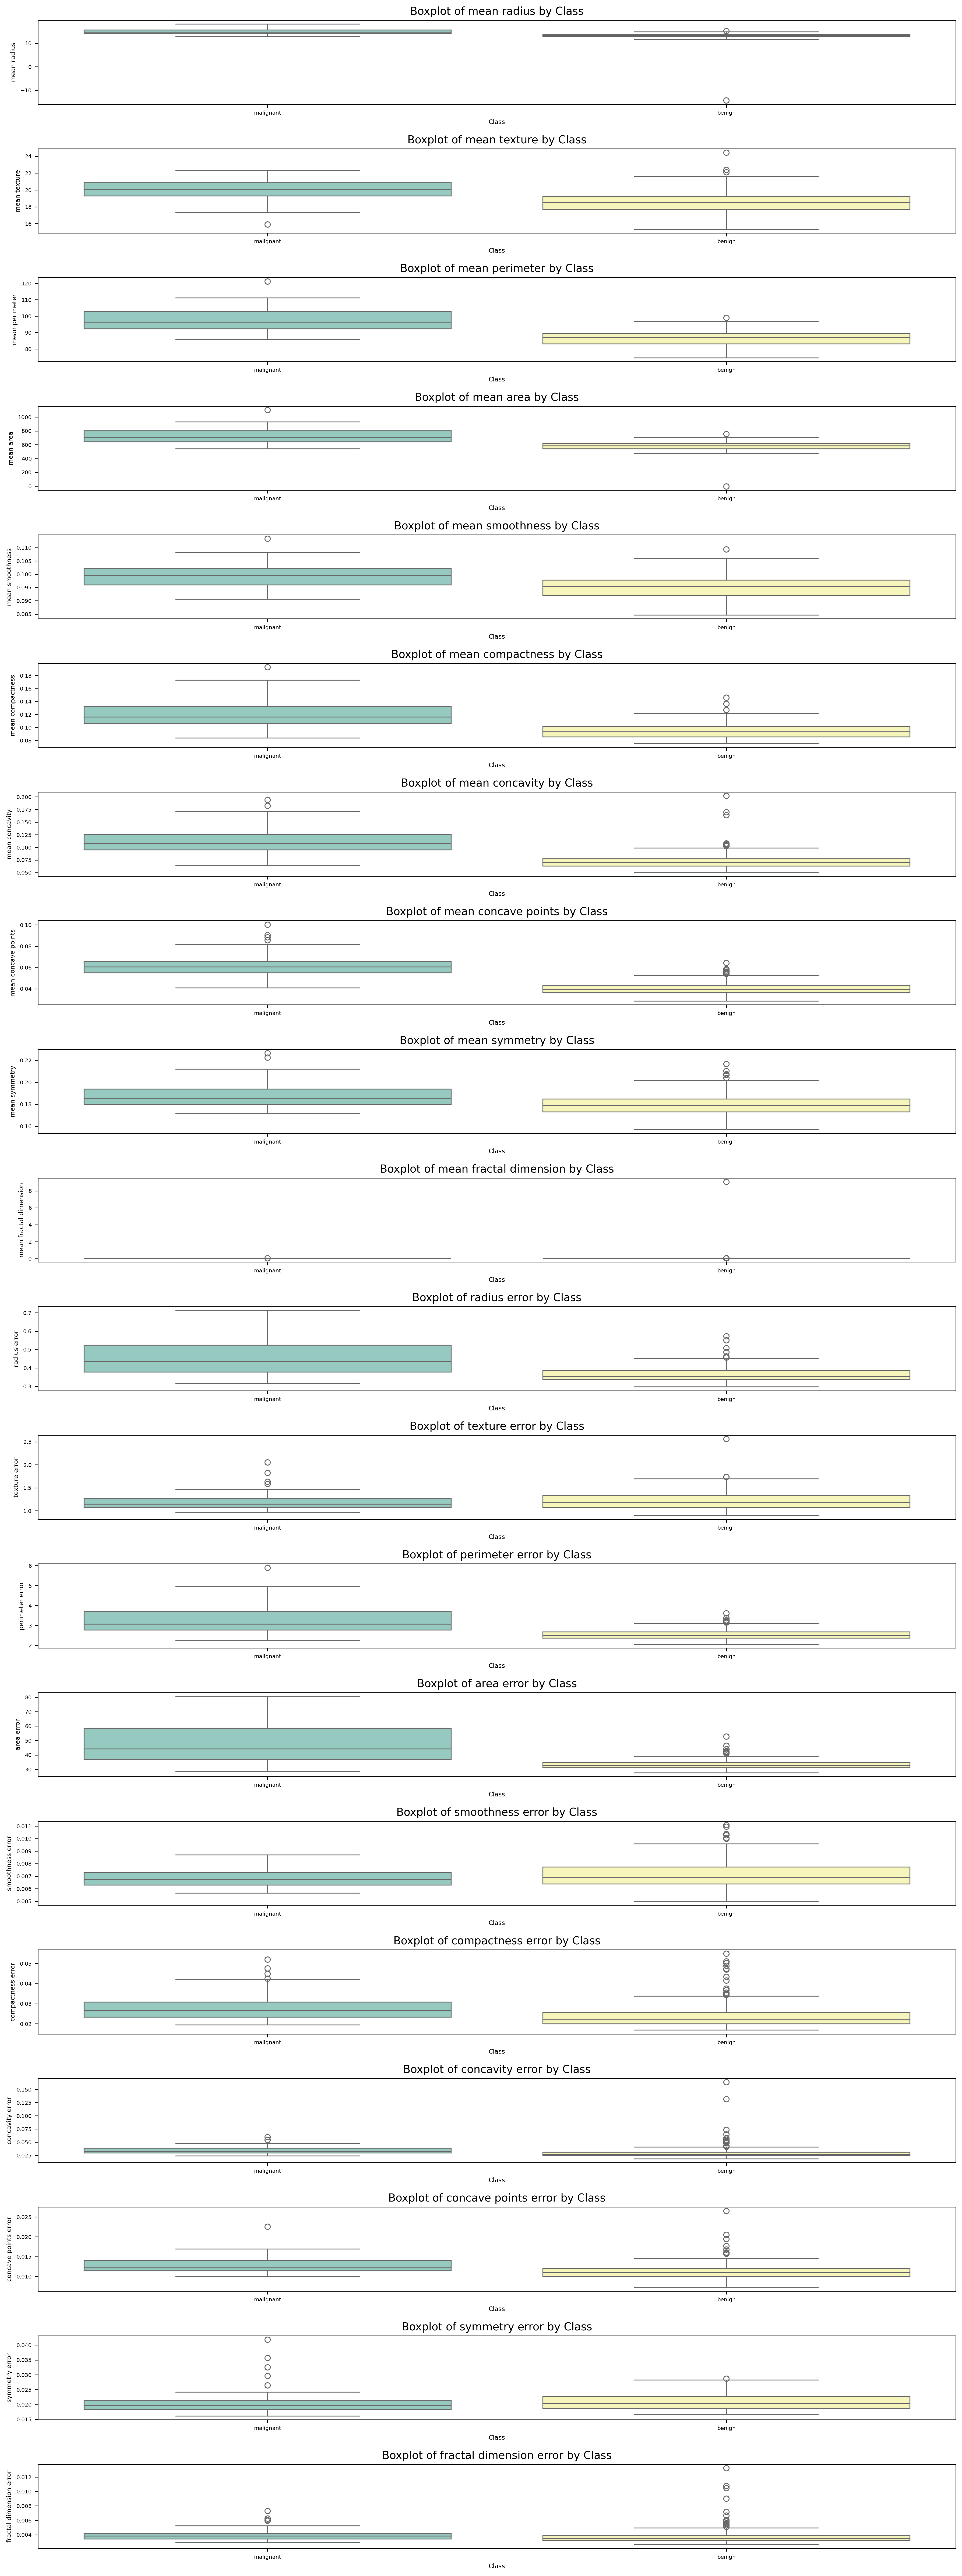

In [11]:
plt.figure(figsize=(15, 40))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.boxplot(x='label', y=feature, data=data, hue='label', palette='Set3', dodge=False)
    plt.title(f'Boxplot of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    ax = plt.gca()
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    plt.tight_layout()

plt.show()

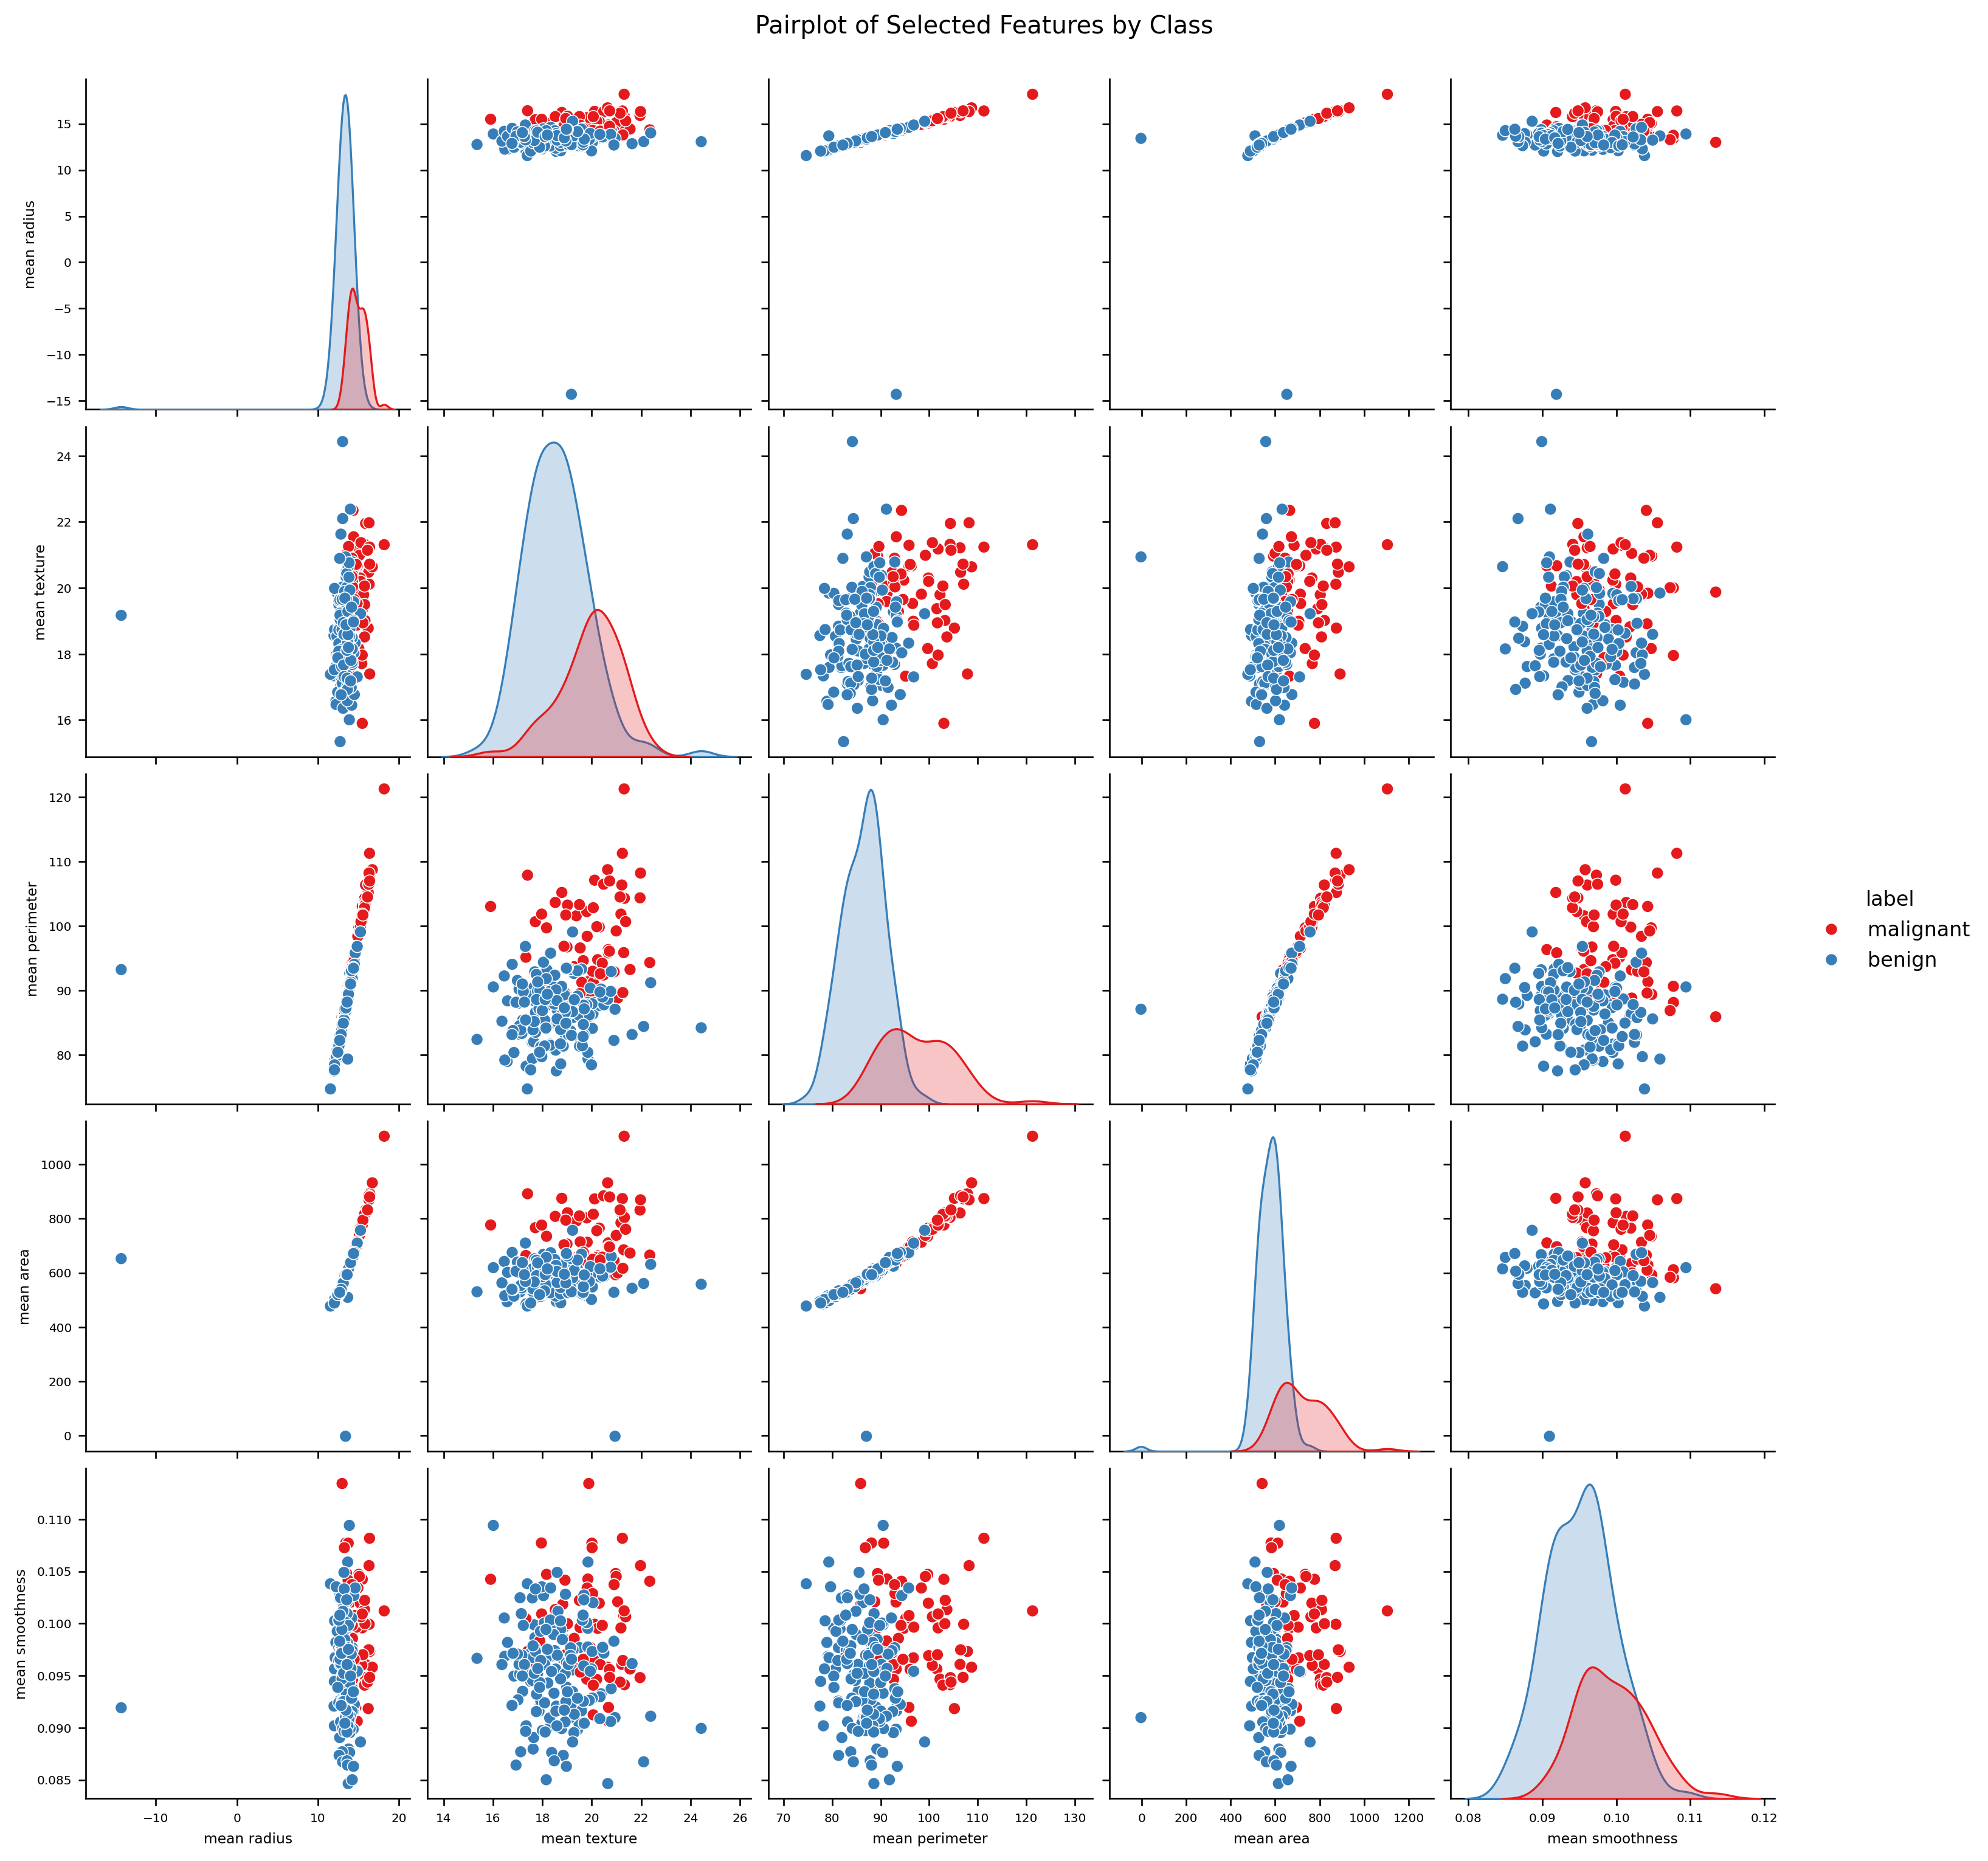

In [12]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(data=data, vars=selected_features, hue='label', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Class', y=1.02)
plt.show()

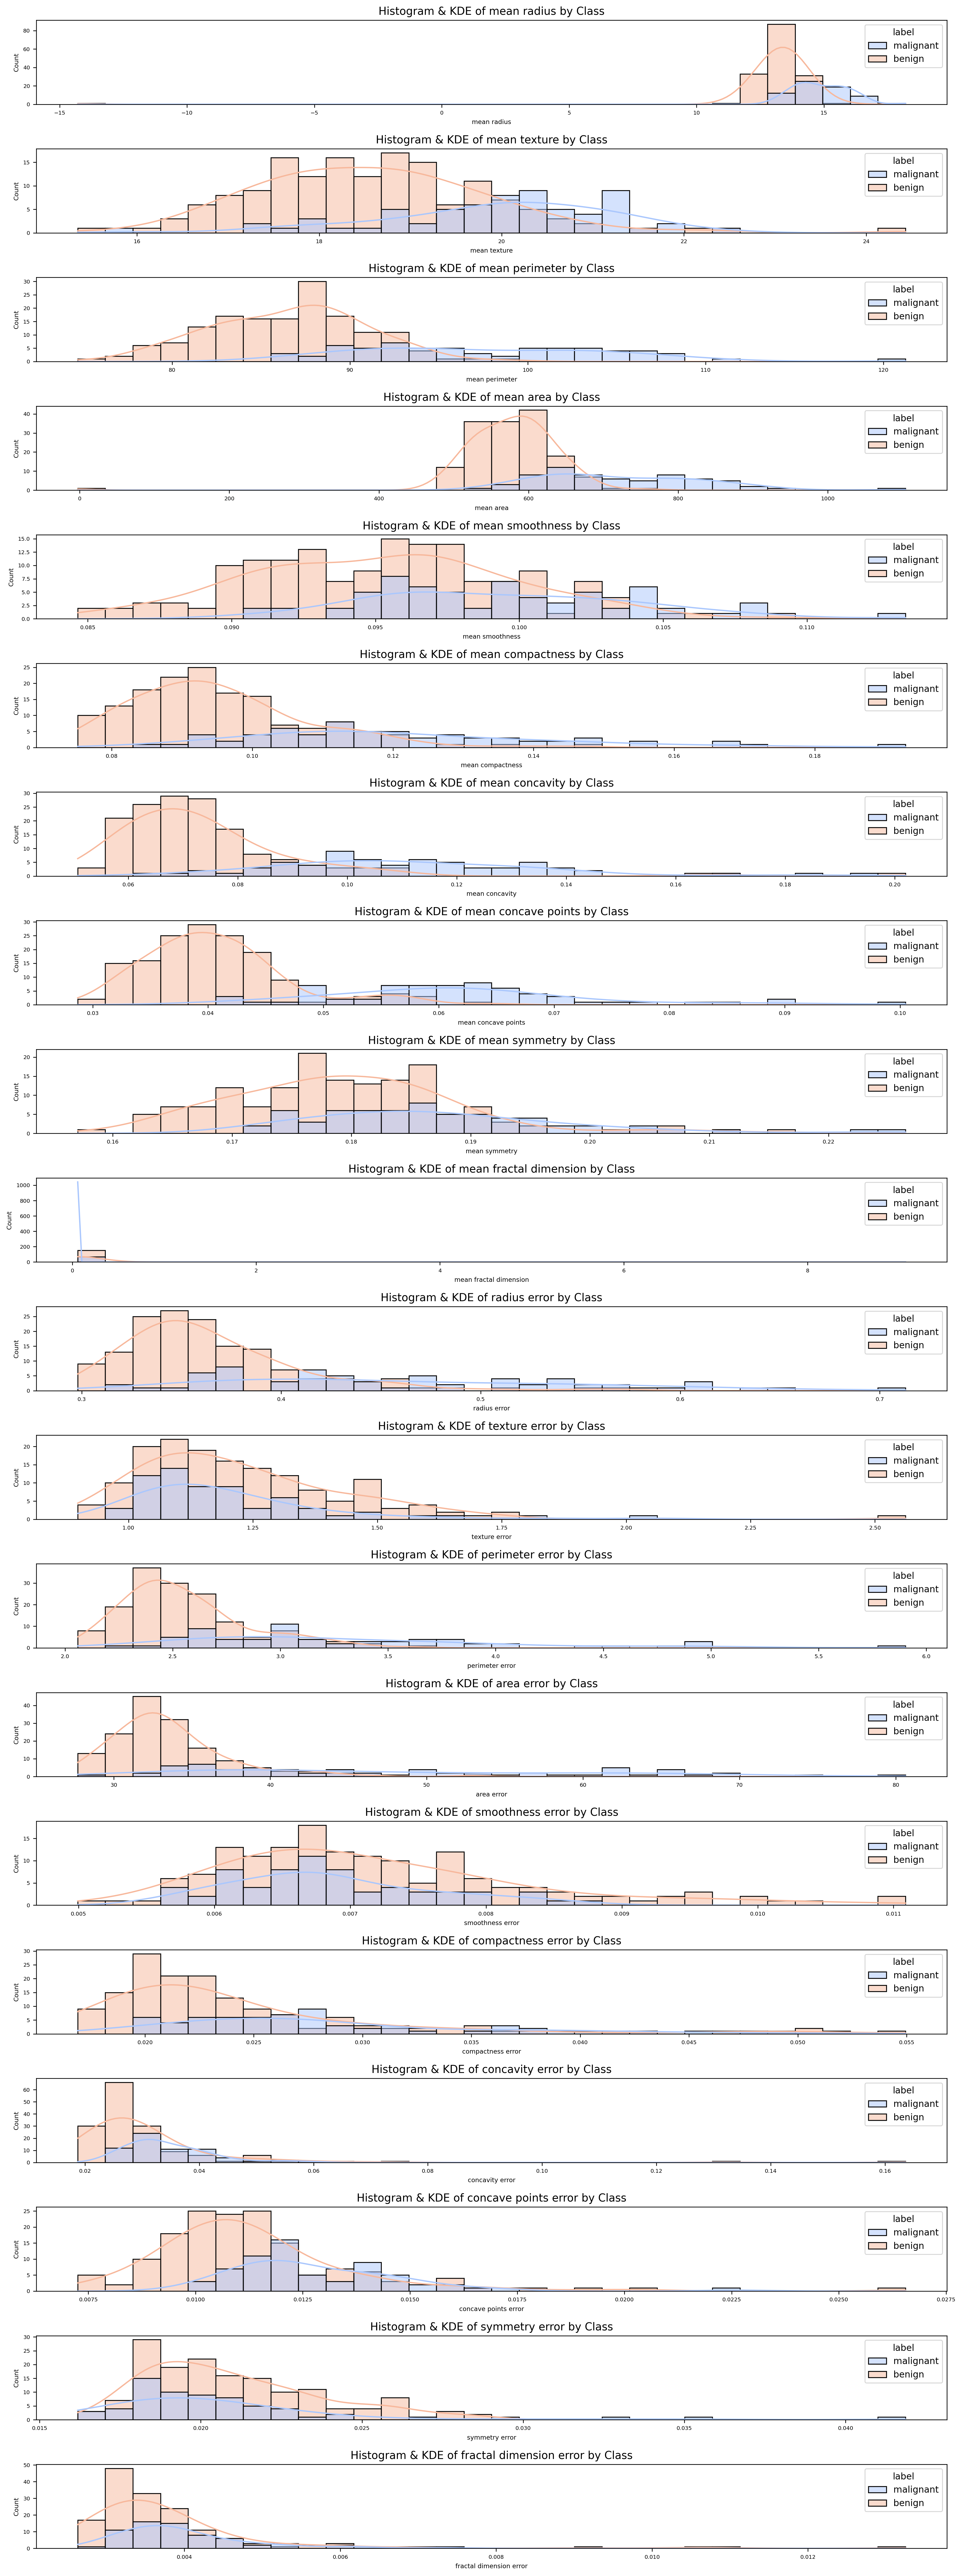

In [13]:
plt.figure(figsize=(15, 40))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.histplot(data=data, x=feature, hue='label', kde=True, palette='coolwarm', bins=30, alpha=0.5)
    plt.title(f'Histogram & KDE of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [14]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [15]:
# Your code here. Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.

from sklearn.model_selection import train_test_split

# Features and labels
X = data[features]
y = data[label]

# Stratified split to preserve class ratios
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import numpy as np

# Create random predictions with same label distribution
np.random.seed(42)
random_preds = np.random.choice(y_train.unique(), size=len(y_test), p=y_train.value_counts(normalize=True).values)

In [18]:
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, confusion_matrix, fbeta_score
)
import seaborn as sns
import matplotlib.pyplot as plt

def print_metrics(y_true, y_pred, model=None, model_name="Model"):
    print(f"\n📊 Performance Metrics: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred, pos_label='malignant'))
    print("Precision:", precision_score(y_true, y_pred, pos_label='malignant'))
    print("F1 Score:", f1_score(y_true, y_pred, pos_label='malignant'))
    print("F-beta (β=0.1):", fbeta_score(y_true, y_pred, beta=0.1, pos_label='malignant'))
    print("F-beta (β=10):", fbeta_score(y_true, y_pred, beta=10, pos_label='malignant'))

    # AUC only if model supports probability predictions
    if model is not None and hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        # Convert labels to binary (malignant = 1)
        y_true_binary = (y_true == 'malignant').astype(int)
        print("AUC:", roc_auc_score(y_true_binary, y_proba))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=['malignant', 'benign'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['malignant', 'benign'],
                yticklabels=['malignant', 'benign'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


📊 Performance Metrics: Random Baseline
Accuracy: 0.3181818181818182
Balanced Accuracy: 0.40446650124069483
Recall: 0.6153846153846154
Precision: 0.24242424242424243
F1 Score: 0.34782608695652173
F-beta (β=0.1): 0.24388771506187742
F-beta (β=10): 0.6061515378844711


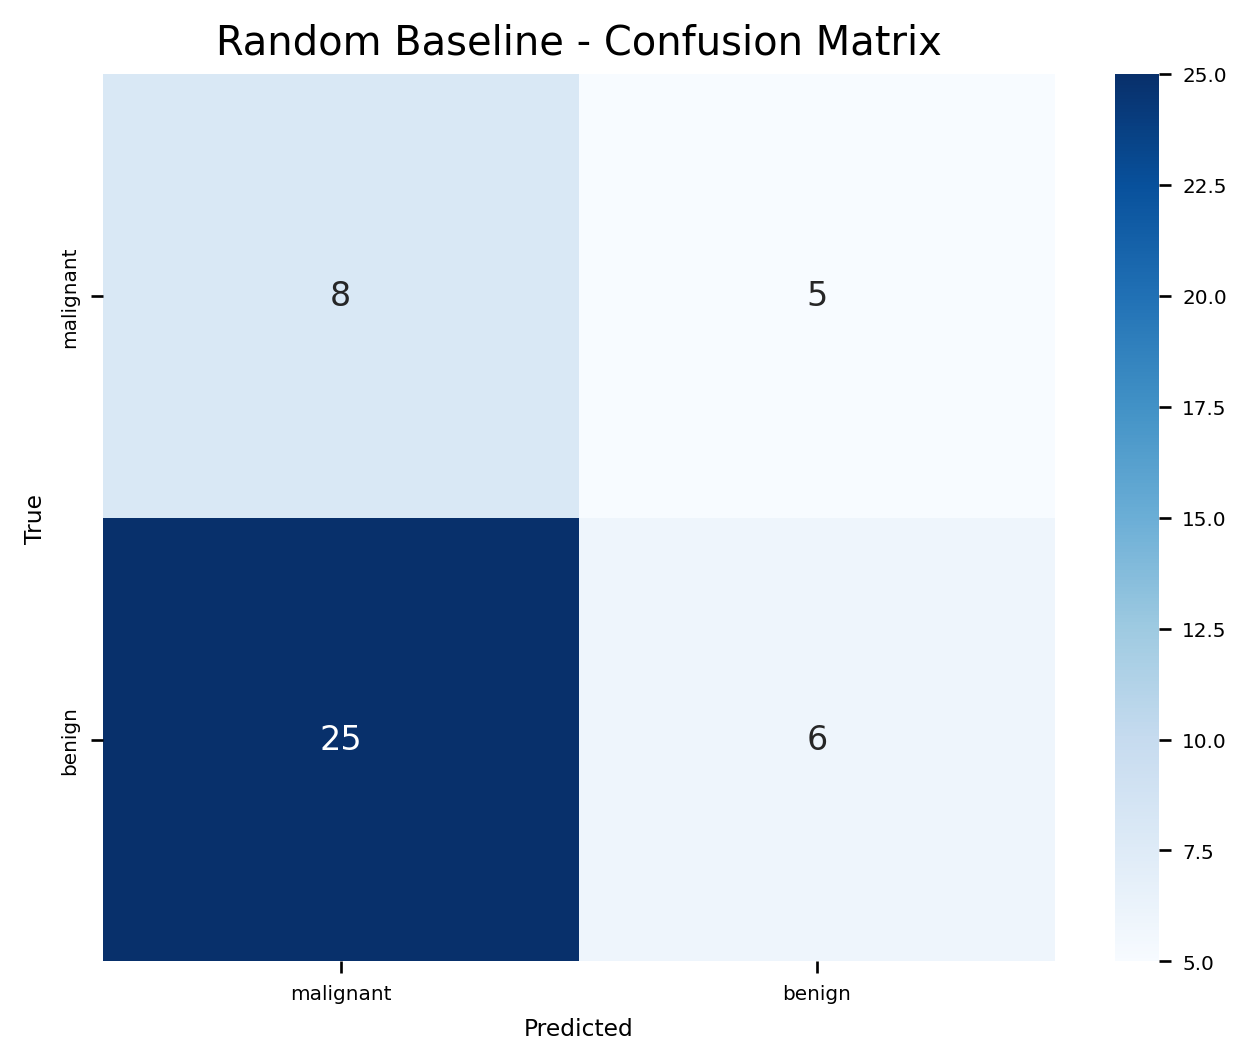

In [19]:
print_metrics(y_test, random_preds, model=None, model_name="Random Baseline")


📊 Performance Metrics: SGD Classifier
Accuracy: 0.9545454545454546
Balanced Accuracy: 0.9230769230769231
Recall: 0.8461538461538461
Precision: 1.0
F1 Score: 0.9166666666666666
F-beta (β=0.1): 0.9982030548068282
F-beta (β=10): 0.84744469870328


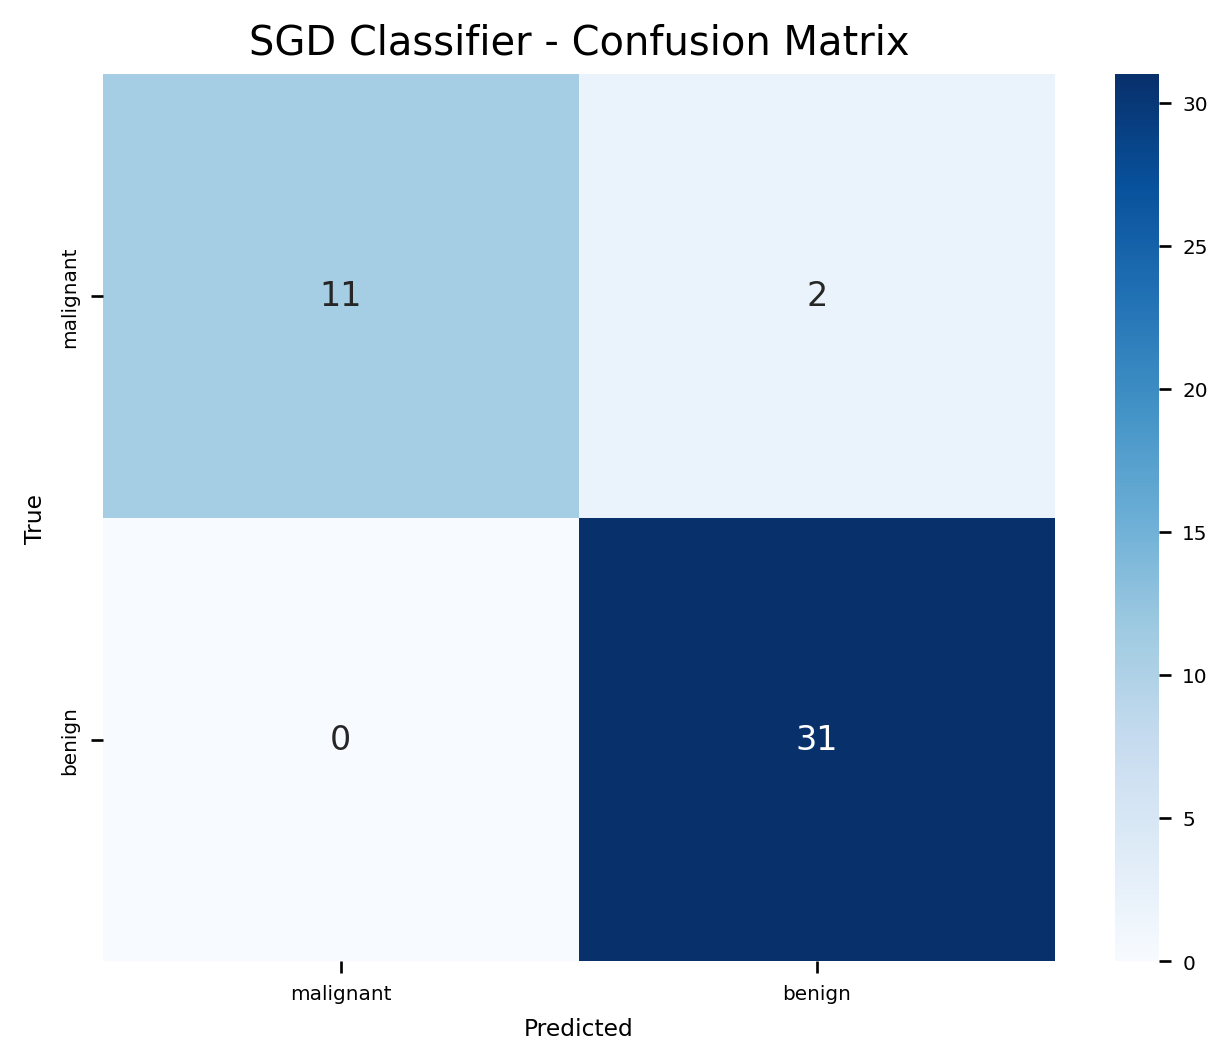

In [20]:
from sklearn.linear_model import SGDClassifier

# Train SGDClassifier without hyperparameter tuning
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)

# Predictions
sgd_preds = sgd.predict(X_test_scaled)

# Evaluate
print_metrics(y_test, sgd_preds, model=sgd, model_name="SGD Classifier")

**Code for a simple baseline model that generates purely random class predictions, with proper preprocessing integrated into the pipeline:** 

(To ensure consistency and ease of autograding, please adhere to the following variable naming conventions: For the DummyClassifier pipeline: `random_pipeline`; For performance metrics, please use the following names, i.e., `accuracy`, `balanced_accuracy`, `recall`, `precision`, `auc`, `f1`, `fbeta_0_1`, `fbeta_10`, for corresponding metric variable names.)

In [21]:
# Your code here. Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.

# ===================== 🧪 Random Baseline Model Evaluation =====================

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, recall_score, precision_score,
                             roc_auc_score, f1_score, fbeta_score, confusion_matrix)

# Create pipeline with StandardScaler and DummyClassifier
random_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DummyClassifier(strategy='uniform', random_state=42))  # random predictions
])

# Fit and predict
random_pipeline.fit(X_train, y_train)
random_preds = random_pipeline.predict(X_test)

# Compute required metrics
accuracy = accuracy_score(y_test, random_preds)
balanced_accuracy = balanced_accuracy_score(y_test, random_preds)
recall = recall_score(y_test, random_preds, pos_label='malignant')
precision = precision_score(y_test, random_preds, pos_label='malignant')
f1 = f1_score(y_test, random_preds, pos_label='malignant')
fbeta_0_1 = fbeta_score(y_test, random_preds, beta=0.1, pos_label='malignant')
fbeta_10 = fbeta_score(y_test, random_preds, beta=10, pos_label='malignant')

# For AUC, need probabilities. But DummyClassifier with 'uniform' gives uniform probs
random_probs = random_pipeline.predict_proba(X_test)[:, list(random_pipeline.classes_).index('malignant')]
auc = roc_auc_score((y_test == 'malignant').astype(int), random_probs)

# Print results
print("📊 Random Baseline Metrics")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("F-beta (β=0.1):", fbeta_0_1)
print("F-beta (β=10):", fbeta_10)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, random_preds))

📊 Random Baseline Metrics
Accuracy: 0.4772727272727273
Balanced Accuracy: 0.47270471464019853
Recall: 0.46153846153846156
Precision: 0.2727272727272727
F1 Score: 0.34285714285714286
F-beta (β=0.1): 0.27383642114776324
F-beta (β=10): 0.4583963691376702
AUC: 0.5
Confusion Matrix:
 [[15 16]
 [ 7  6]]


**Code for the SGD baseline model without hyper-parameter optimization, with proper preprocessing integrated into the pipeline:** 

(To ensure consistency and ease of autograding, please adhere to the following variable naming conventions: For the DummyClassifier pipeline: `sgd_pipeline`; For performance metrics, please use the following names, i.e., `accuracy_sgd`, `balanced_accuracy_sgd`, `recall_sgd`, `precision_sgd`, `auc_sgd`, `f1_sgd`, `fbeta_0_1_sgd`, `fbeta_10_sgd`, for corresponding metric variable names.)

In [22]:
# Your code here. Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.

# ===================== ⚙️ SGD Classifier Baseline =====================

from sklearn.linear_model import SGDClassifier

# Create pipeline with StandardScaler and SGDClassifier
sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(random_state=42))
])

# Fit and predict
sgd_pipeline.fit(X_train, y_train)
sgd_preds = sgd_pipeline.predict(X_test)

# Compute required metrics
accuracy_sgd = accuracy_score(y_test, sgd_preds)
balanced_accuracy_sgd = balanced_accuracy_score(y_test, sgd_preds)
recall_sgd = recall_score(y_test, sgd_preds, pos_label='malignant')
precision_sgd = precision_score(y_test, sgd_preds, pos_label='malignant')
f1_sgd = f1_score(y_test, sgd_preds, pos_label='malignant')
fbeta_0_1_sgd = fbeta_score(y_test, sgd_preds, beta=0.1, pos_label='malignant')
fbeta_10_sgd = fbeta_score(y_test, sgd_preds, beta=10, pos_label='malignant')

# SGD doesn't support predict_proba by default — use decision_function + normalize to [0,1]
from sklearn.preprocessing import MinMaxScaler
sgd_decision = sgd_pipeline.decision_function(X_test)
sgd_probs = MinMaxScaler().fit_transform(sgd_decision.reshape(-1, 1)).ravel()
auc_sgd = roc_auc_score((y_test == 'malignant').astype(int), sgd_probs)

# Print results
print("📊 SGD Classifier Baseline Metrics")
print("Accuracy:", accuracy_sgd)
print("Balanced Accuracy:", balanced_accuracy_sgd)
print("Recall:", recall_sgd)
print("Precision:", precision_sgd)
print("F1 Score:", f1_sgd)
print("F-beta (β=0.1):", fbeta_0_1_sgd)
print("F-beta (β=10):", fbeta_10_sgd)
print("AUC:", auc_sgd)
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_preds))

📊 SGD Classifier Baseline Metrics
Accuracy: 0.9545454545454546
Balanced Accuracy: 0.9230769230769231
Recall: 0.8461538461538461
Precision: 1.0
F1 Score: 0.9166666666666666
F-beta (β=0.1): 0.9982030548068282
F-beta (β=10): 0.84744469870328
AUC: 0.9925558312655087
Confusion Matrix:
 [[31  0]
 [ 2 11]]


## 3. Model Optimisation [40%]

<!-- BEGIN QUESTION -->

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

# Answer here.

#### I choose balanced accuracy because it accounts for class imbalance by averaging sensitivity and specificity, providing a more reliable performance measure than accuracy alone in imbalanced datasets like this one. This ensures the model performs well across all classes, not just the majority class.

<!-- END QUESTION -->

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

**Code for define the three models' pipelines and define hyperparameters:**

In [23]:
# Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.


# You are free to write other code in this cell, but stick to the pre-set pipeline and hyperparameter names for autograding.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  # example of third model

# SGD Classifier pipeline and hyperparameters
sgd_pl = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=42))
])

sgd_params = dict(
    sgd__alpha=[0.0001, 0.001, 0.01],
    sgd__max_iter=[1000, 2000],
    sgd__loss=['hinge', 'log'],  # hinge = SVM loss, log = logistic regression loss
)

# SVM Classifier pipeline and hyperparameters
svc_pl = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability=True))
])

svc_params = dict(
    svc__C=[0.1, 1, 10],
    svc__kernel=['linear', 'rbf'],
    svc__gamma=['scale', 'auto']
)

# Third model: Random Forest pipeline and hyperparameters
custom_pl = Pipeline([
    ('scaler', StandardScaler()),  # RF doesn’t necessarily need scaling, but for consistency
    ('rf', RandomForestClassifier(random_state=42))
])

custom_params = dict(
    rf__n_estimators=[50, 100, 200],
    rf__max_depth=[None, 10, 20],
    rf__min_samples_split=[2, 5]
)



<!-- BEGIN QUESTION -->

**Code for conduct hyper-parameter optimization of the training dataset, choose the best model based on analyzing performance (including confusion matrices):**

--- Hyperparameter tuning for SGD Classifier ---
Best parameters: {'sgd__alpha': 0.001, 'sgd__loss': 'hinge', 'sgd__max_iter': 1000}
Performance on test set for SGD Classifier:
Accuracy: 0.9318
Balanced Accuracy: 0.8846


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "

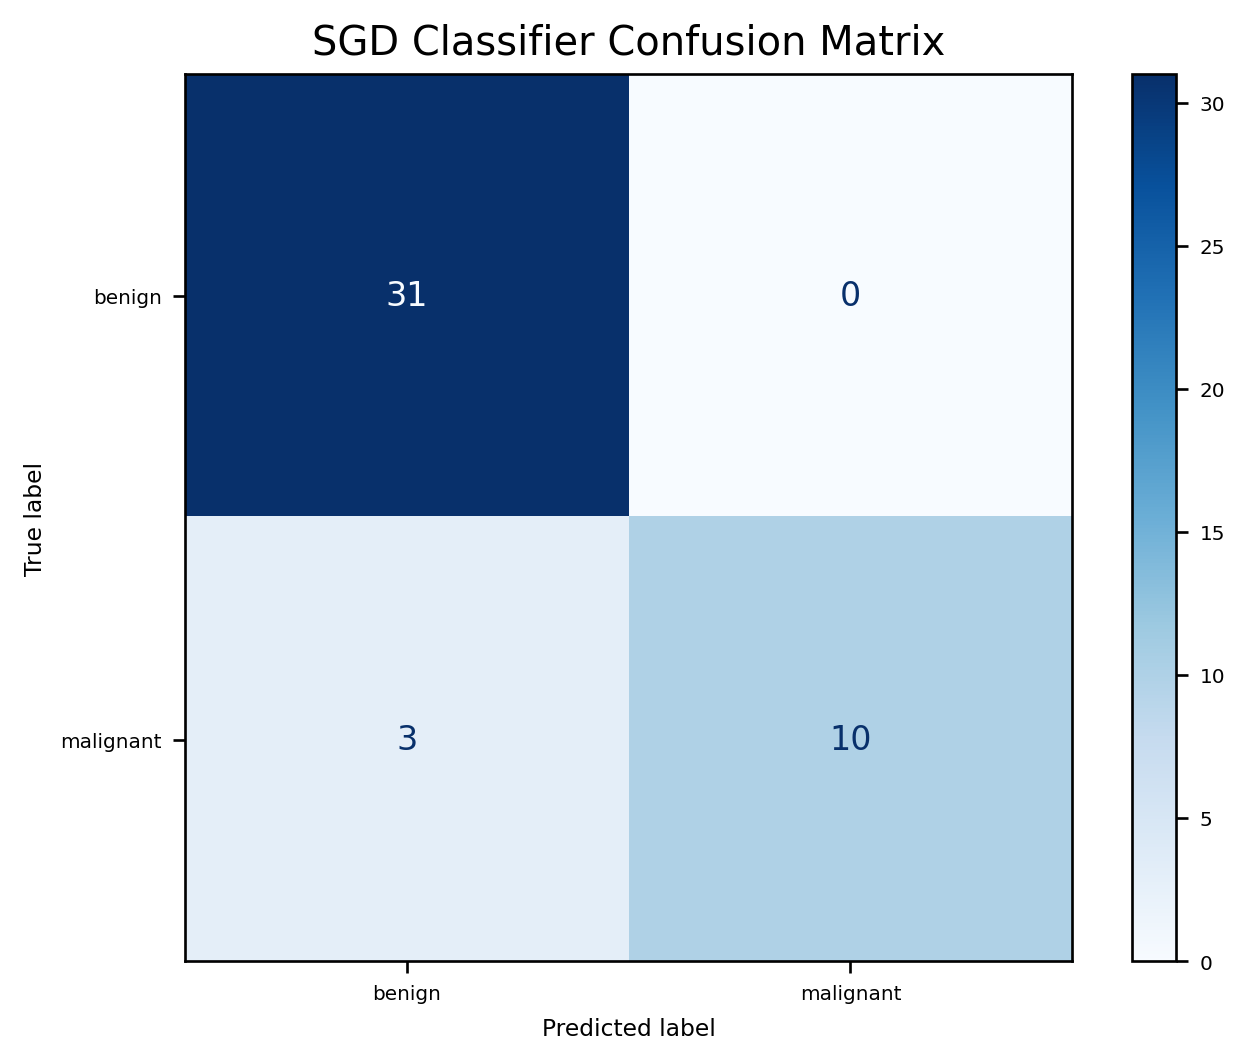

--- Hyperparameter tuning for SVM Classifier ---
Best parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Performance on test set for SVM Classifier:
Accuracy: 0.9318
Balanced Accuracy: 0.9069


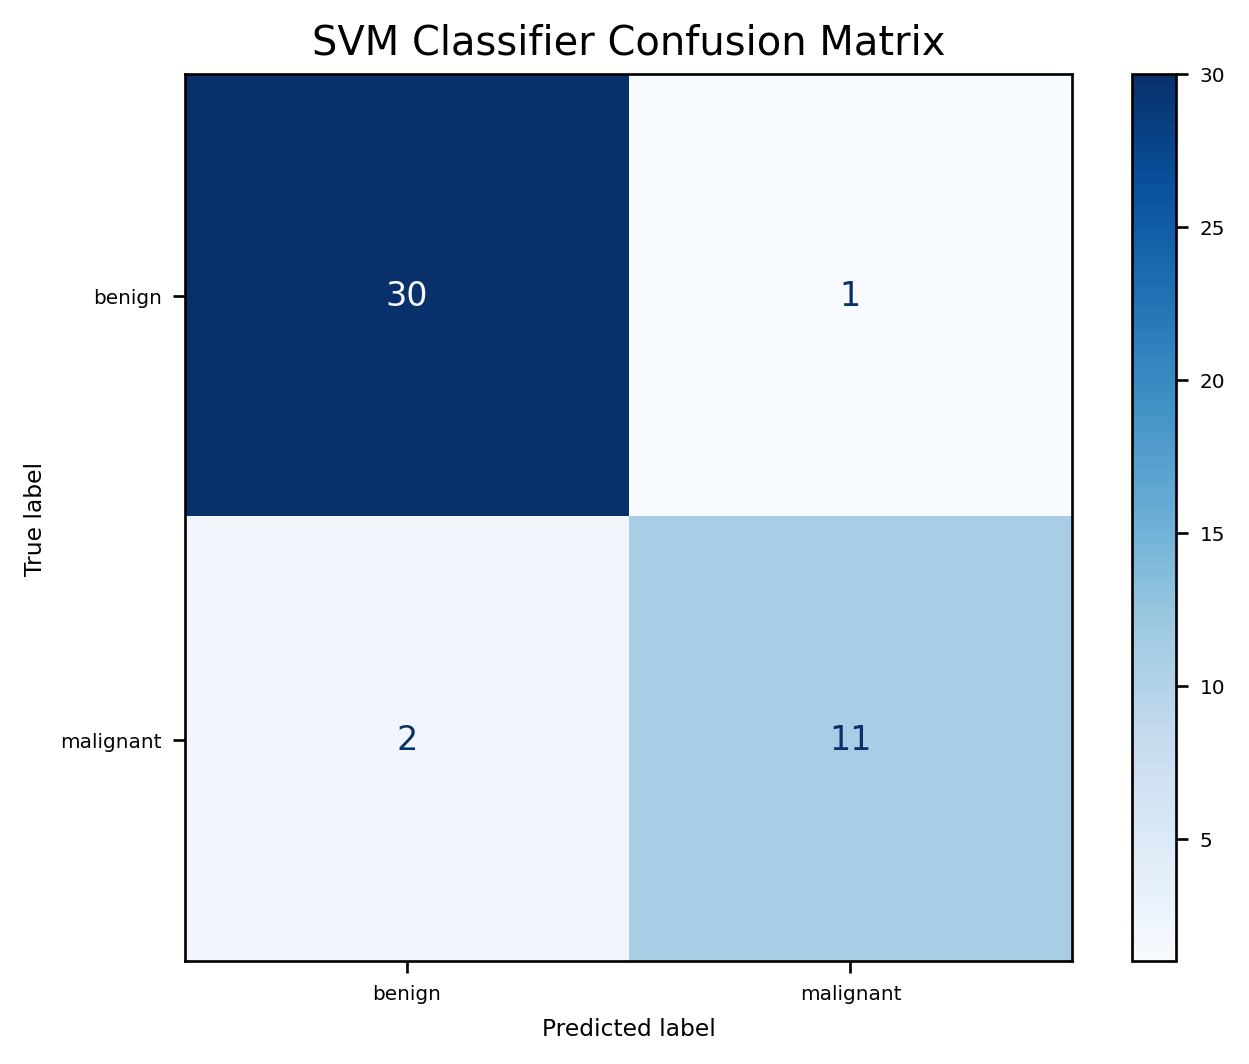

--- Hyperparameter tuning for Random Forest ---
Best parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Performance on test set for Random Forest:
Accuracy: 0.9091
Balanced Accuracy: 0.8462


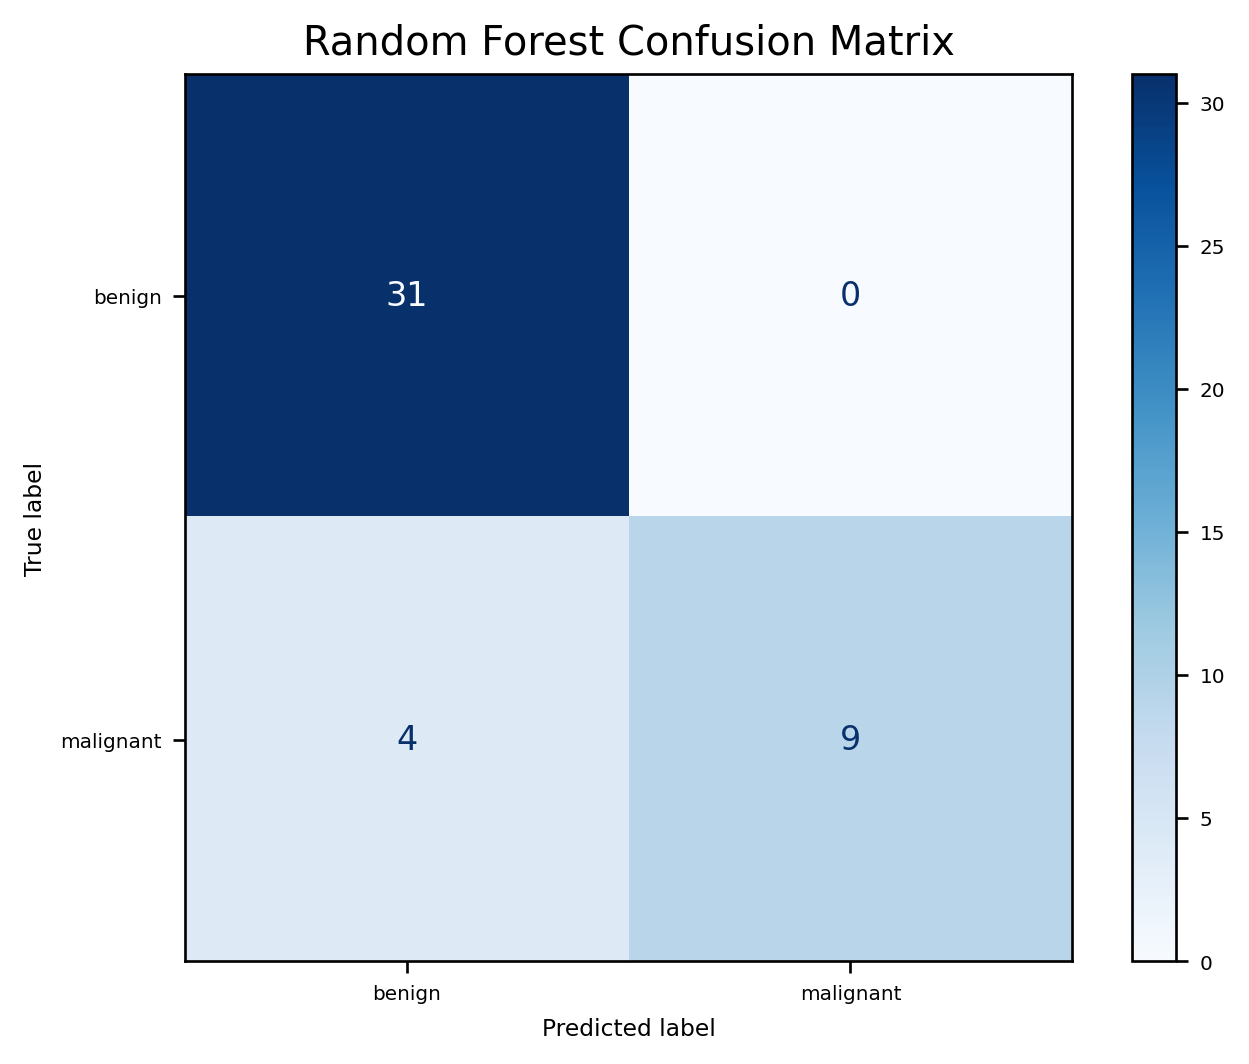

Best model is SVM Classifier with balanced accuracy: 0.9069


In [24]:
# Your code here. Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to run GridSearchCV and print confusion matrix
def tune_and_evaluate(pipeline, param_grid, X_train, y_train, X_test, y_test, model_name):
    print(f"--- Hyperparameter tuning for {model_name} ---")
    grid = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best parameters: {grid.best_params_}")
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print(f"Performance on test set for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    
    cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    return best_model, balanced_accuracy_score(y_test, y_pred)

# Run hyperparameter tuning for all three models
best_sgd, bal_acc_sgd = tune_and_evaluate(sgd_pl, sgd_params, X_train, y_train, X_test, y_test, "SGD Classifier")
best_svc, bal_acc_svc = tune_and_evaluate(svc_pl, svc_params, X_train, y_train, X_test, y_test, "SVM Classifier")
best_rf, bal_acc_rf = tune_and_evaluate(custom_pl, custom_params, X_train, y_train, X_test, y_test, "Random Forest")

# Choose best model based on balanced accuracy
best_model = max(
    [(best_sgd, bal_acc_sgd, "SGD Classifier"), 
     (best_svc, bal_acc_svc, "SVM Classifier"), 
     (best_rf, bal_acc_rf, "Random Forest")], 
    key=lambda x: x[1]
)

print(f"Best model is {best_model[2]} with balanced accuracy: {best_model[1]:.4f}")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Code for showing the final evaluation results on the test dataset of the choosen best model:**

Final evaluation for SVM Classifier:
              precision    recall  f1-score   support

      benign       0.94      0.97      0.95        31
   malignant       0.92      0.85      0.88        13

    accuracy                           0.93        44
   macro avg       0.93      0.91      0.92        44
weighted avg       0.93      0.93      0.93        44

AUC: 0.9851


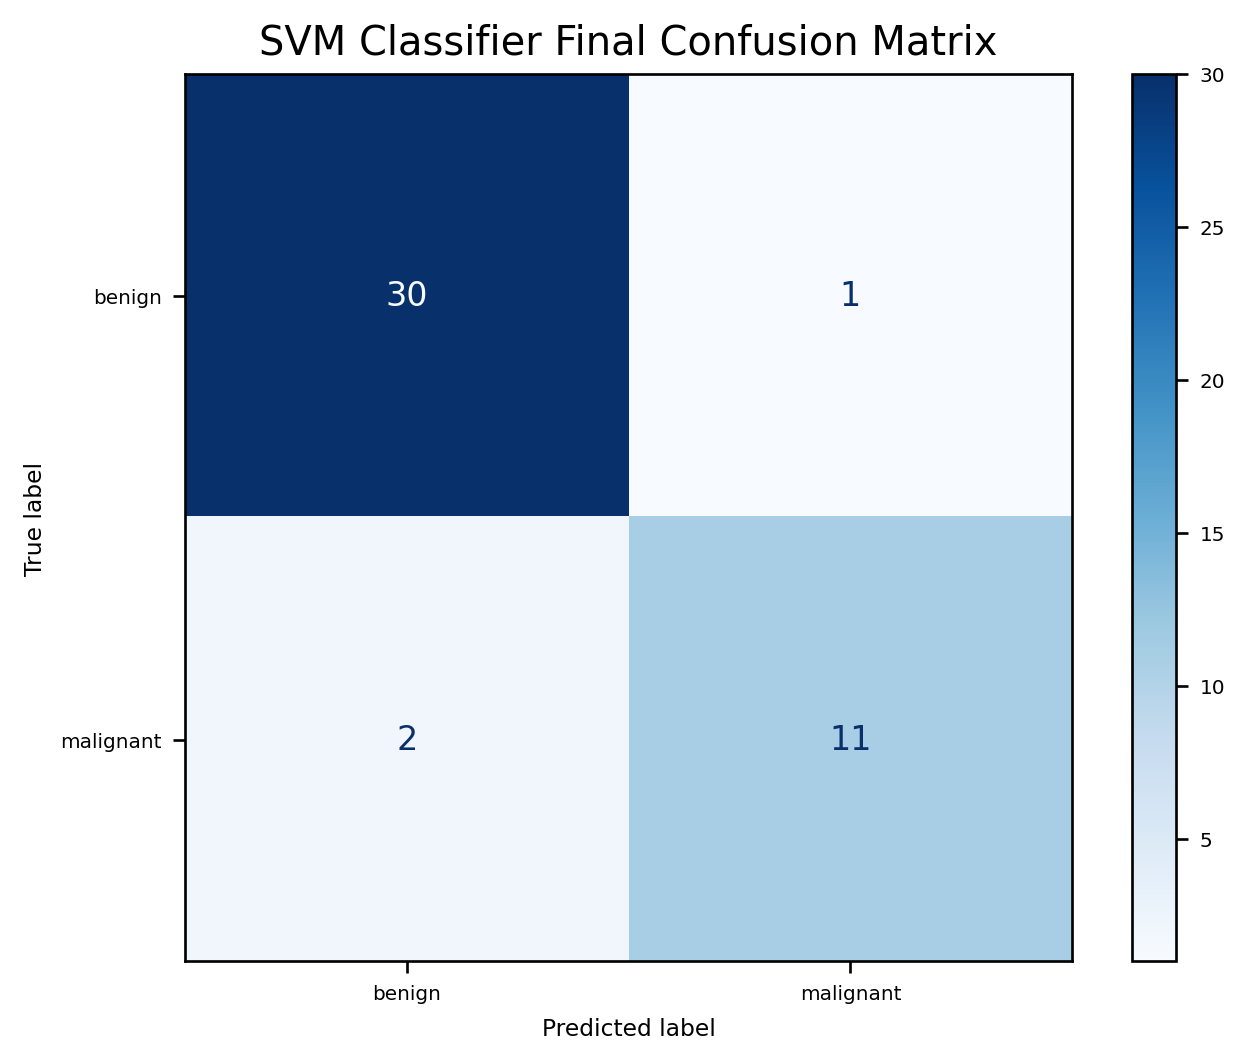

In [25]:
# Your code here. Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.

from sklearn.metrics import classification_report, roc_auc_score

final_model = best_model[0]
y_pred_final = final_model.predict(X_test)
y_proba_final = None
if hasattr(final_model, "predict_proba"):
    y_proba_final = final_model.predict_proba(X_test)[:, 1]

print(f"Final evaluation for {best_model[2]}:")

print(classification_report(y_test, y_pred_final))

if y_proba_final is not None:
    auc_score = roc_auc_score(y_test, y_proba_final)
    print(f"AUC: {auc_score:.4f}")
else:
    print("AUC: Not available for this model")

cm_final = confusion_matrix(y_test, y_pred_final, labels=final_model.classes_)
ConfusionMatrixDisplay(cm_final, display_labels=final_model.classes_).plot(cmap=plt.cm.Blues)
plt.title(f"{best_model[2]} Final Confusion Matrix")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [26]:
# Answer here

from sklearn.metrics import recall_score

# y_test and y_pred are your test labels and predicted labels by final model
recall_malignant = recall_score(y_test, y_pred_final, pos_label='malignant')

false_negative_rate = 1 - recall_malignant

print(f"False Negative Rate (probability that malignant is predicted benign): {false_negative_rate:.4f}")

False Negative Rate (probability that malignant is predicted benign): 0.1538


<!-- END QUESTION -->

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [27]:
# Only answer in this cell; do not create new cells for autograding.
# You may use the display() or print() function to print outputs, include proper comments for your code, and print sub-question separating lines for better visual effects.


# After calculation, store the selected features in this dictionary: keys are the four chosen features, values are their corresponding t-scores.

features_dict = {}

# Assuming X_train is your feature DataFrame and y_train are labels
# Loop through each feature/column in X_train
for feature in X_train.columns:
    # Values for each class
    x1 = X_train.loc[y_train == 'benign', feature]
    x2 = X_train.loc[y_train == 'malignant', feature]
    
    # Calculate means and stddevs
    mean1, mean2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()
    
    # Compute T-score
    t_score = (mean2 - mean1) / (0.5 * (std1 + std2))
    
    features_dict[feature] = t_score

# Sort features by absolute T-score in descending order
sorted_features = sorted(features_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Select top 4 features
top_4_features = dict(sorted_features[:4])

print("Top 4 discriminative features and their T-scores:")
for feat, score in top_4_features.items():
    print(f"{feat}: {score:.4f}")

# Store result in the required dictionary
features_dict = top_4_features



Top 4 discriminative features and their T-scores:
mean concave points: 2.3633
mean perimeter: 1.8534
area error: 1.6863
mean concavity: 1.6464


<!-- BEGIN QUESTION -->

### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [28]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [29]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

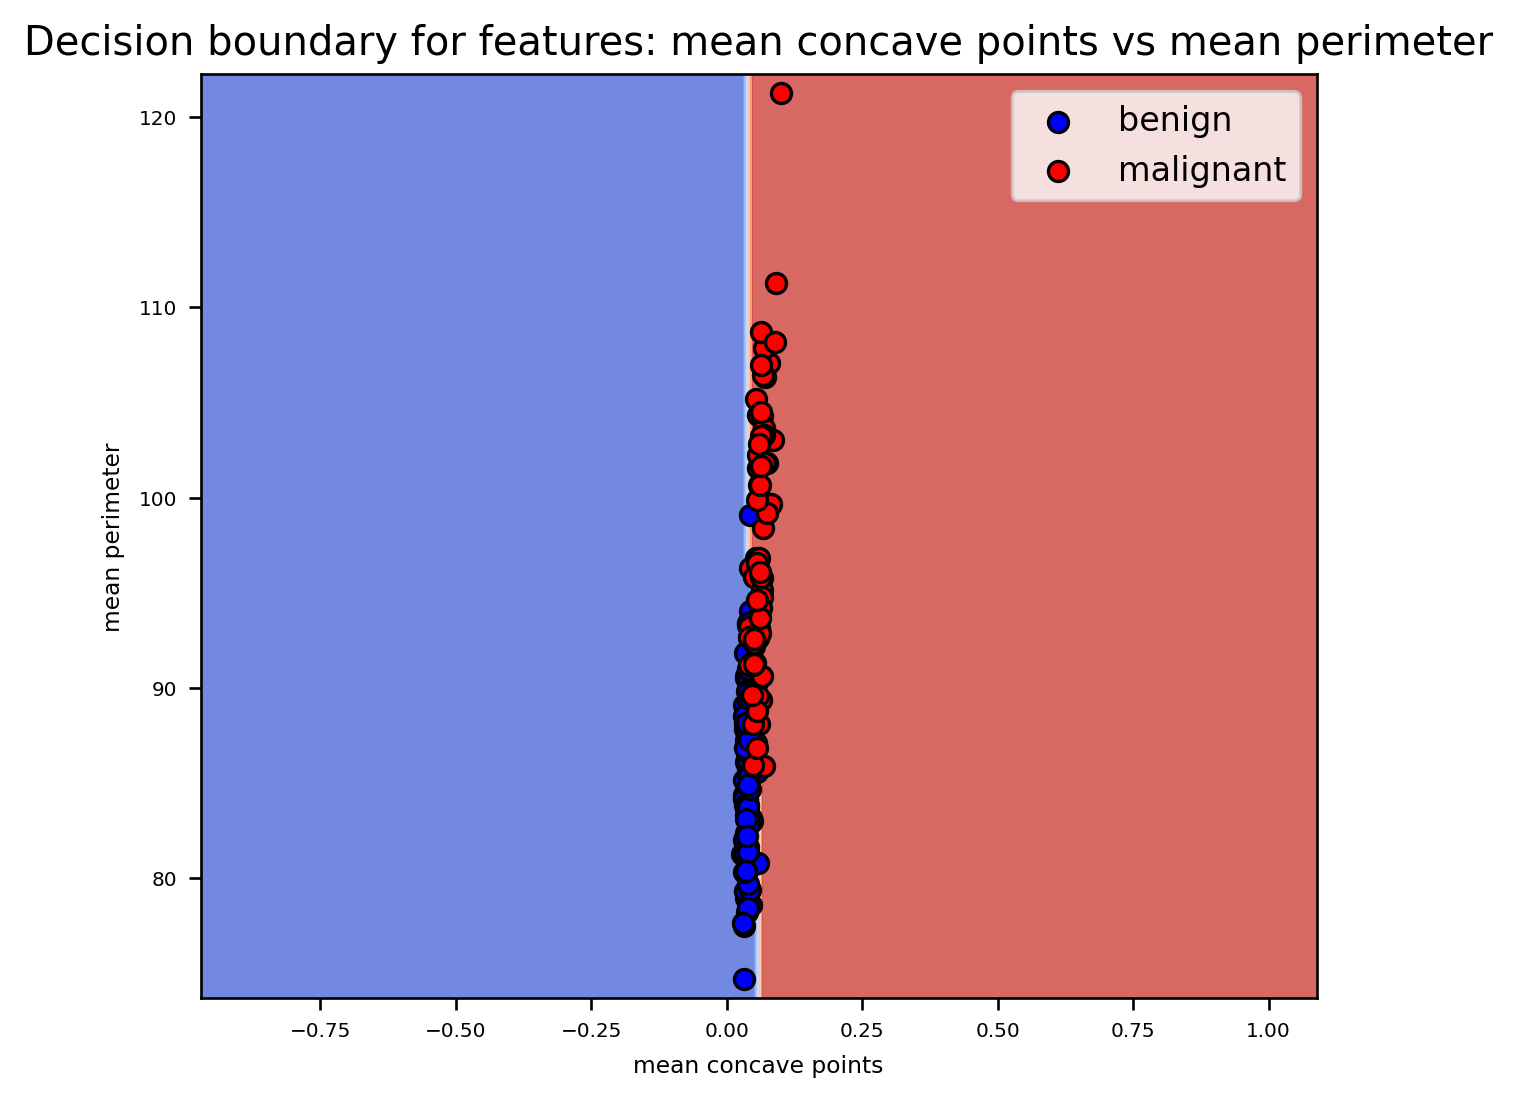

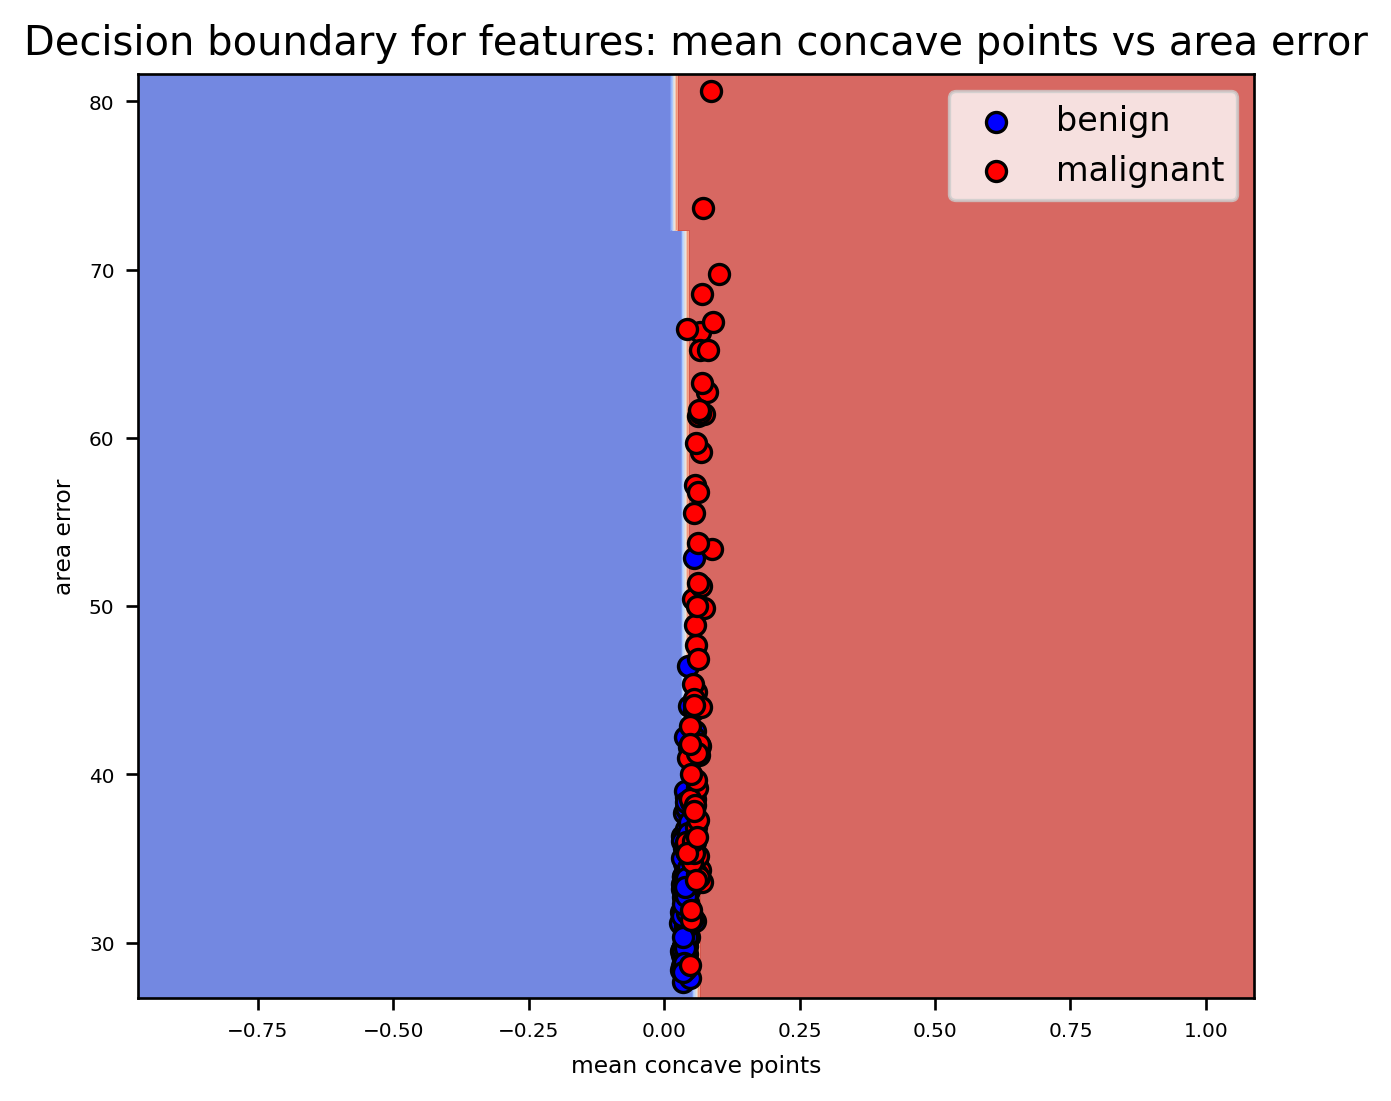

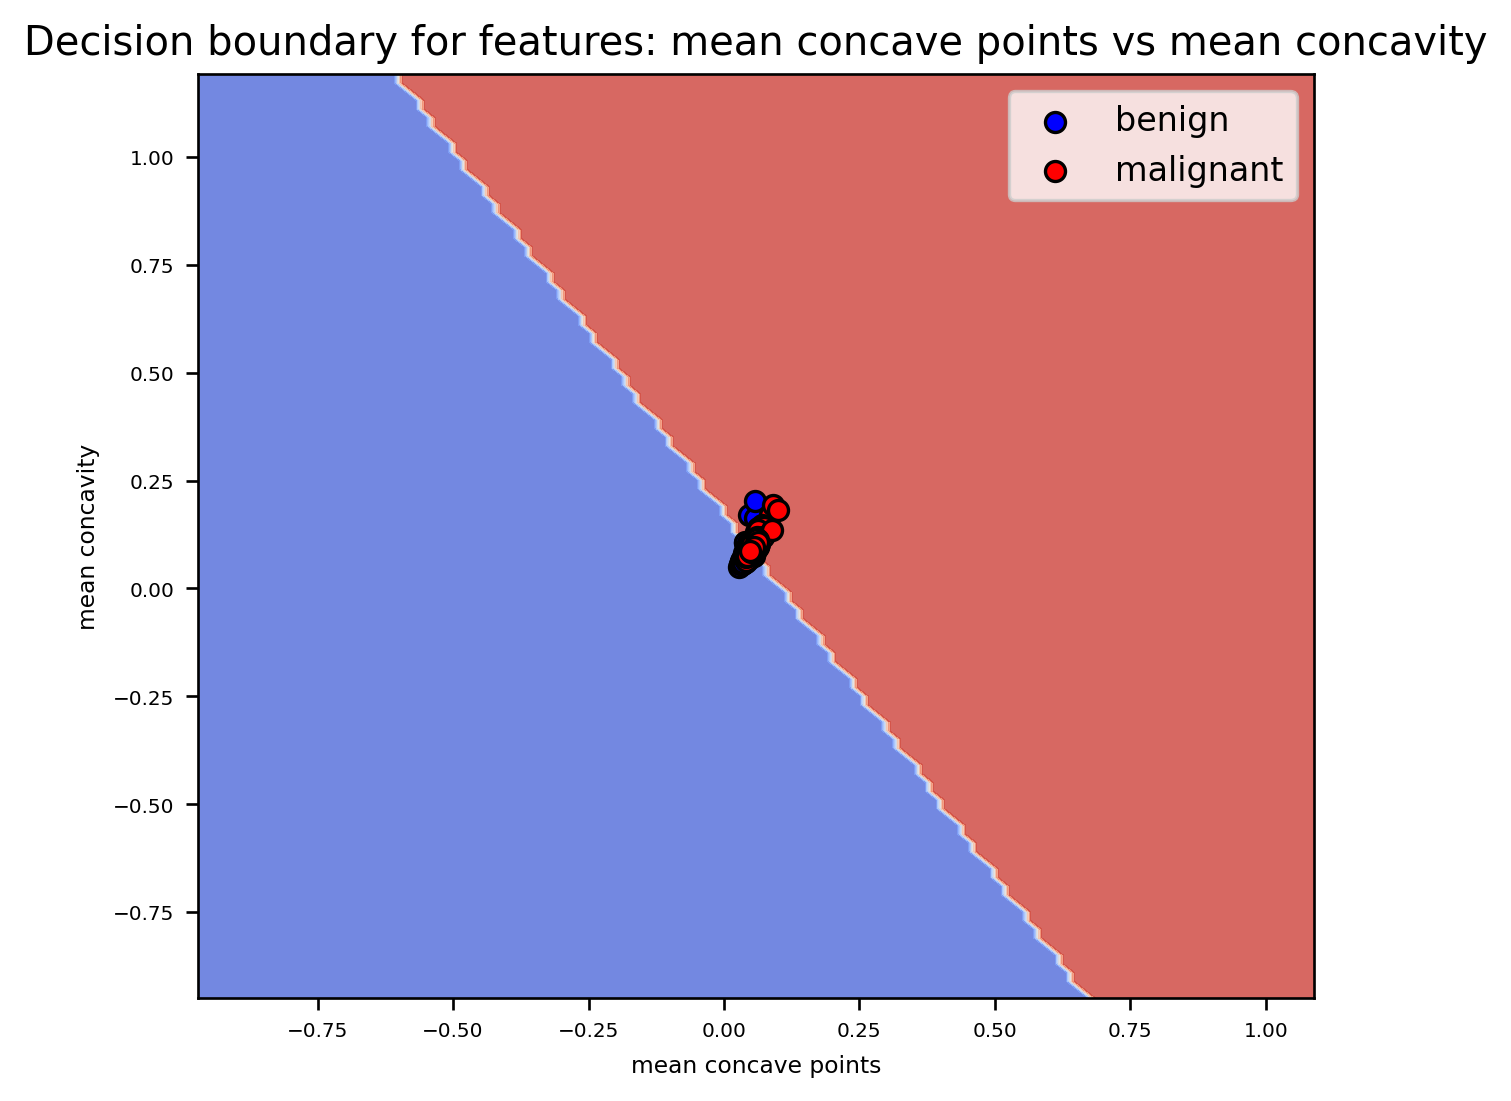

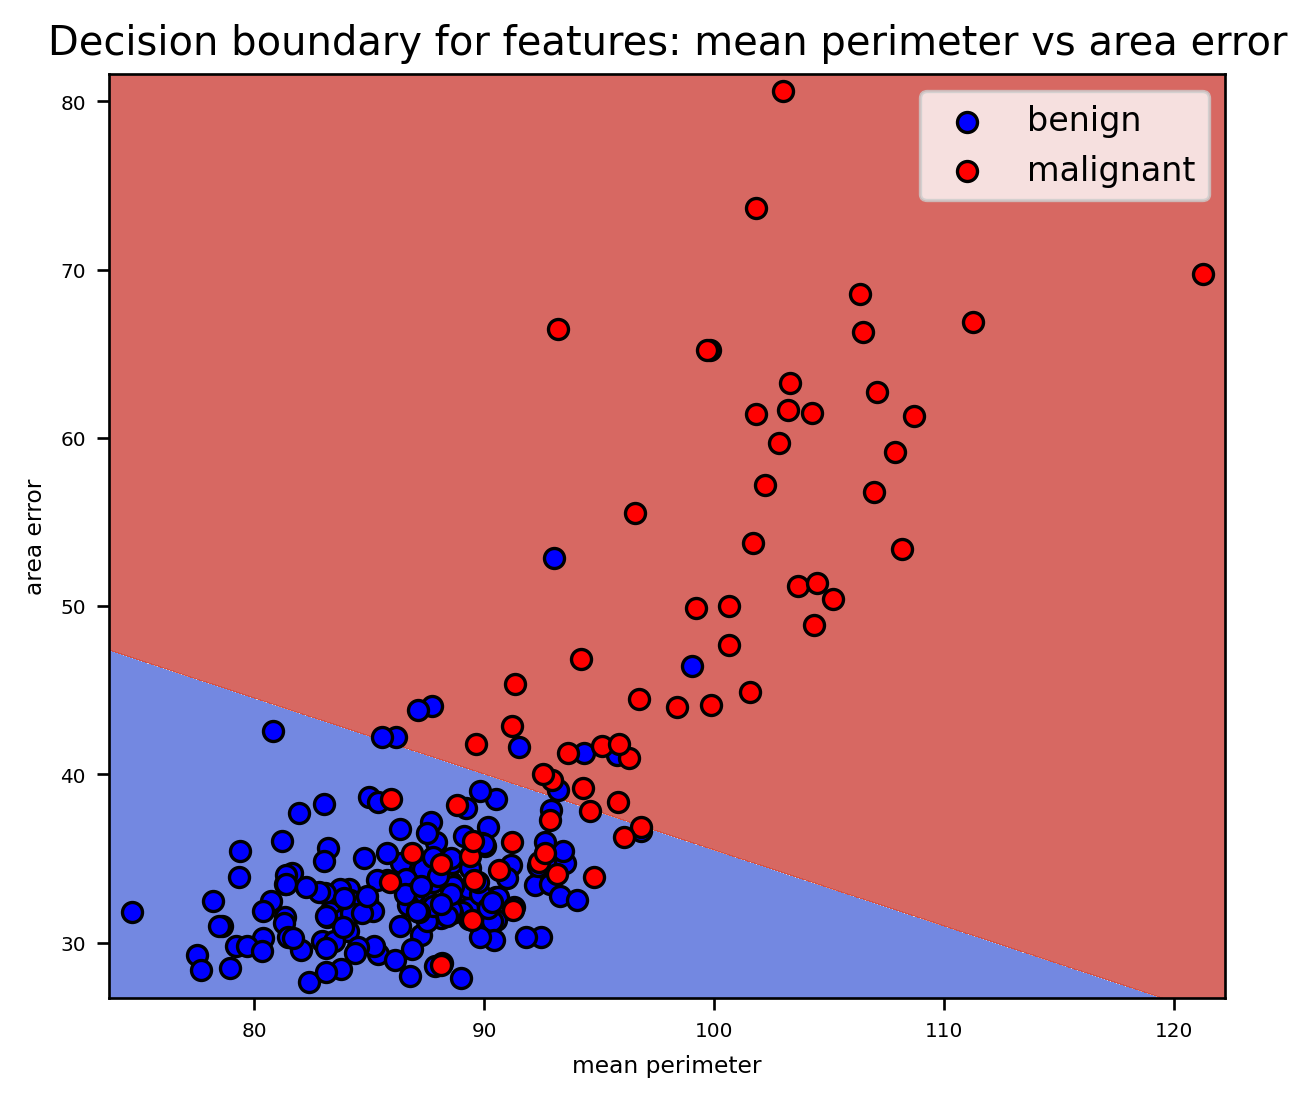

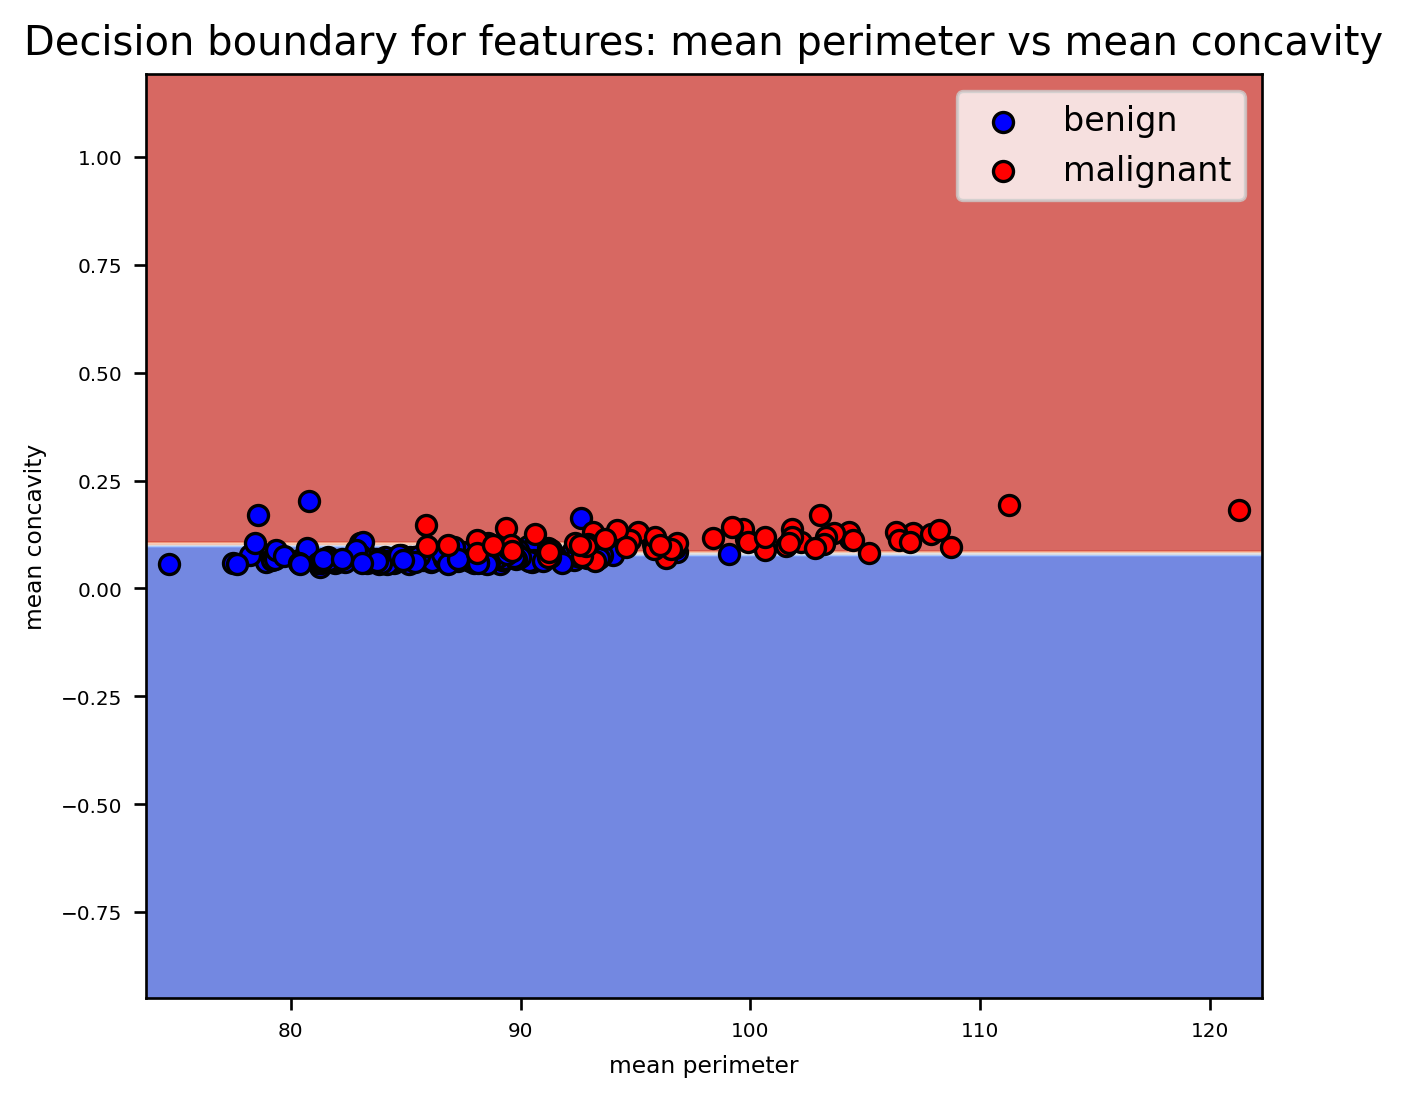

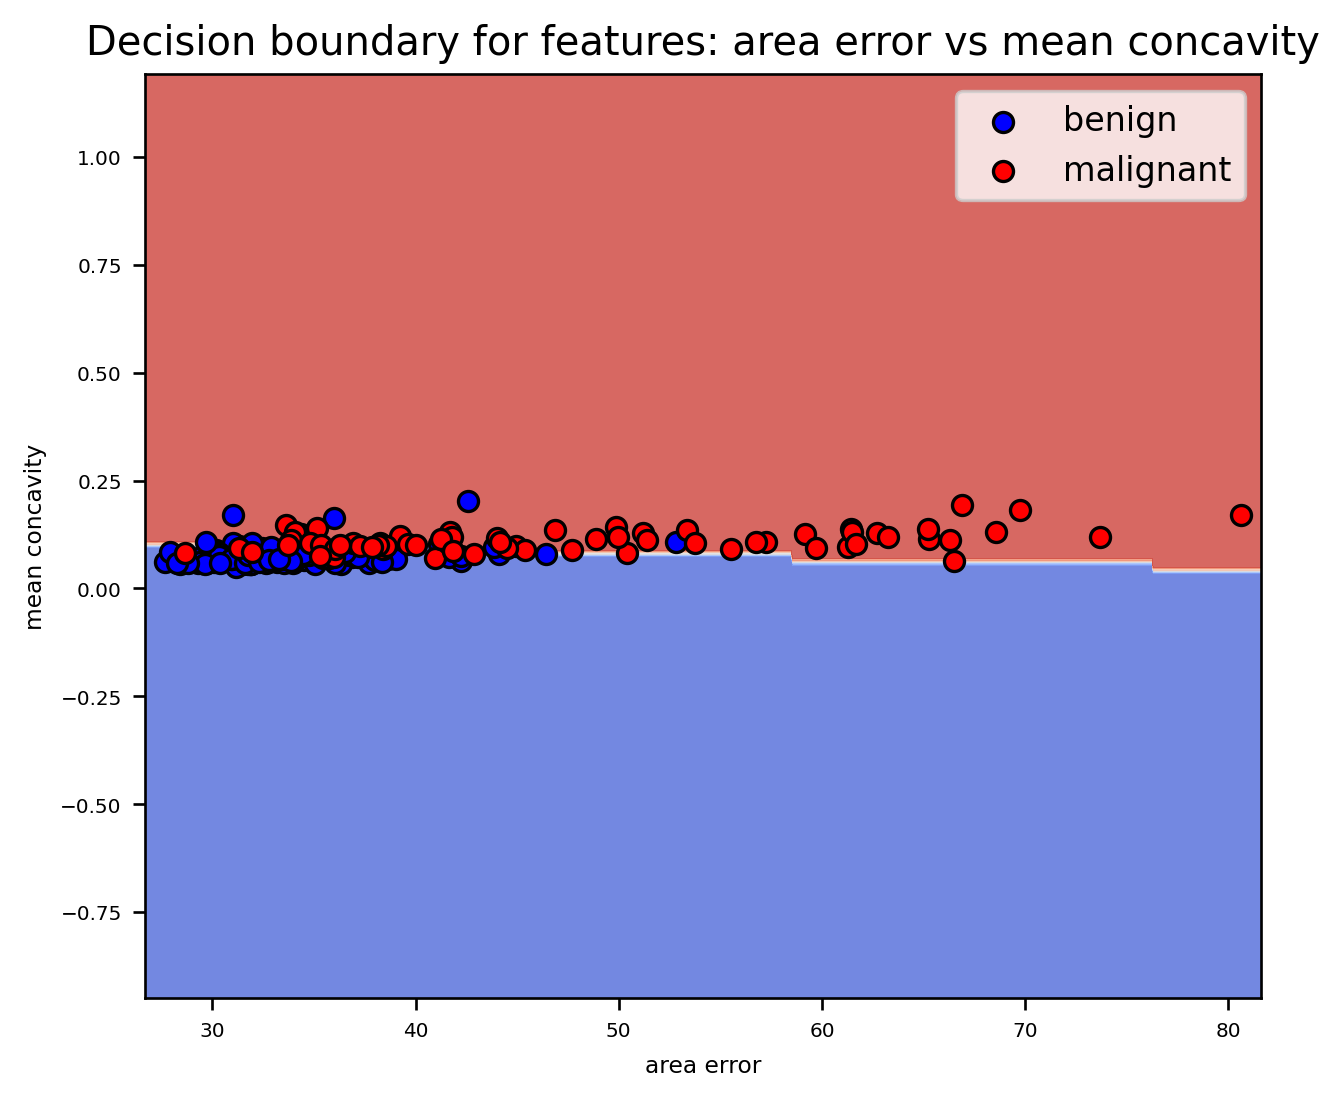

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

# Fixed plot_contours function that handles string predictions
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    # Create full feature grid based on xmean repeated for all points
    fullx = np.ones((xx.ravel().shape[0], 1)) * np.reshape(xmean, (1, -1))
    
    # Assign the grid values to the two varying features
    fullx[:, n1] = xx.ravel()
    fullx[:, n2] = yy.ravel()
    
    # Convert to DataFrame with correct feature names (from original X dataframe)
    feature_names = X.columns
    fullx_df = pd.DataFrame(fullx, columns=feature_names)
    
    # Predict using the classifier pipeline
    Z_pred = clf.predict(fullx_df)
    
    # Convert string predictions to numeric values for contour plotting
    # Map predictions to numeric values (0 for benign, 1 for malignant)
    if isinstance(Z_pred[0], str):
        Z = np.where(Z_pred == 'malignant', 1, 0)
    else:
        Z = Z_pred
    
    # Reshape predictions to match meshgrid shape
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary contours
    out = plt.contourf(xx, yy, Z, **params)
    return out

# Helper function to create meshgrid (assuming this was missing)
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in"""
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Your top 4 features and their indices in your dataset
top_features = ['mean concave points', 'mean perimeter', 'area error', 'mean concavity']

# Get indices of top features in your dataset columns
feature_indices = [X.columns.get_loc(feat) for feat in top_features]

# Loop through all pairs of top 4 features and plot decision boundaries
for n1, n2 in combinations(feature_indices, 2):
    # Extract data for the two classes and the two features
    x1_class0 = X[y == 'benign'].iloc[:, [n1, n2]].values
    x2_class1 = X[y == 'malignant'].iloc[:, [n1, n2]].values
    
    # Compute weighted mean of the two classes for all features
    mean_class0 = X[y == 'benign'].mean().values
    mean_class1 = X[y == 'malignant'].mean().values
    xmean = 0.5 * (mean_class0 + mean_class1)
    
    # Create meshgrid for decision boundary plot
    xx, yy = make_meshgrid(X.iloc[:, n1], X.iloc[:, n2])
    
    # Plot setup
    plt.figure(figsize=(6, 5))
    plt.title(f"Decision boundary for features: {X.columns[n1]} vs {X.columns[n2]}")
    
    # Plot decision boundaries using your trained best model pipeline (e.g. best_model[0])
    plot_contours(best_model[0], xx, yy, xmean, n1, n2, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Scatter plot of actual data points
    plt.scatter(x1_class0[:, 0], x1_class0[:, 1], color='blue', label='benign', edgecolor='k')
    plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='red', label='malignant', edgecolor='k')
    
    plt.xlabel(X.columns[n1])
    plt.ylabel(X.columns[n2])
    plt.legend()
    plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [ ]:
# Answer here


<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)